# Idea

Basically, I'd like to do some simple tests on "how can we establish the efficacy of our period-finding method?". I think it would be effective to do two simple things for now:

1. Try lots of different amplitudes (at a given frequency) and see how low we have to go before the period isn't readily identifiable
2. Try lots of different periods (at a given amplitude) and see what frequencies are recoverable and what aren't.

Then, eventually, we'll want to do a grid to see if these two things depend on each other. We'll also want to investigate the effects of "survey" (WSERV5 vs 7 vs 8), spatial location (esp. which footprint), and source brightness / photometric noise.

In [1]:
# for a simple object, let's load its data, inject signals, and see what happens.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

<ErrorbarContainer object of 3 artists>

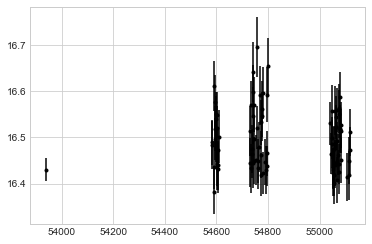

In [47]:
# load data
times = np.loadtxt("sample_k_dates.txt")
mags = np.loadtxt("sample_k_mags.txt")
errs = np.loadtxt("sample_k_errs.txt")


plt.errorbar(times, mags, yerr=errs, fmt='k.', )

In [4]:
from wuvars.analysis.periods import f_max, f_min, N_eval

In [12]:
freq = np.linspace(f_min, f_max, N_eval)

ls = LombScargle(times, mags, dy=errs)
power = ls.power(freq)

min_freq = 1/100
power[freq<min_freq] = 0

fmax = freq[np.nanargmax(power)]
fap = ls.false_alarm_probability(np.nanmax(power))
print(f"FAP of peak: {fap:.2e}. Freq: {fmax:.2f} day^-1 (Period: {24. / fmax:.2f} hours)")

FAP of peak: 1.89e-02. Freq: 1.80 day^-1 (Period: 13.33 hours)


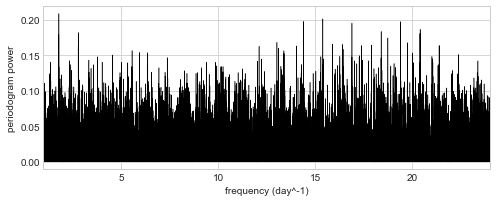

In [16]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(freq, power, '-k', rasterized=True, lw=0.5)
ax.set(xlim=(1, 24),
       xlabel='frequency (day^-1)',
       ylabel='periodogram power');

[0.01       0.01184611 0.01403303 0.01662369 0.0196926  0.02332808
 0.0276347  0.03273637 0.03877987 0.04593906 0.05441992 0.06446644
 0.07636766 0.09046598 0.107167   0.12695121 0.15038781 0.17815107
 0.21103973 0.25      ]
Injected Amplitude: 0.010. FAP of peak: 2.83e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected Amplitude: 0.012. FAP of peak: 3.14e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected Amplitude: 0.014. FAP of peak: 3.58e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected Amplitude: 0.017. FAP of peak: 3.75e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected Amplitude: 0.020. FAP of peak: 4.01e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected Amplitude: 0.023. FAP of peak: 4.45e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected Amplitude: 0.028. FAP of peak: 5.18e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected Amplitude: 0.033. FAP of peak: 1.40e-02. Freq: 2.164 day^-1 (Period: 0.46 days)
Injected Amplitude: 0.039. FAP of peak: 2.01e-03. Freq: 2.1

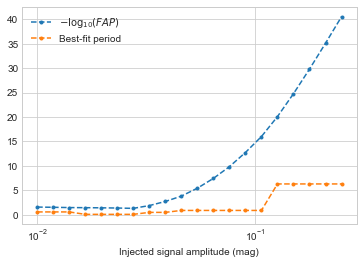

In [44]:
amplitudes = (0.01, 0.1, 1, 10)
amplitudes = np.logspace(-2, np.log10(0.25), 20)
print(amplitudes)

found_period = []
found_fap = []

for amp in amplitudes:
    
    sin_mags = amp * np.sin(times) + mags
    
    ls = LombScargle(times, sin_mags, dy=errs)
    power = ls.power(freq)

    min_freq = 1/100
    power[freq<min_freq] = 0

    fmax = freq[np.nanargmax(power)]
    fap = ls.false_alarm_probability(np.nanmax(power))
    print(f"Injected Amplitude: {amp:.3f}. FAP of peak: {fap:.2e}. Freq: {fmax:.3f} day^-1 (Period: {1. / fmax:.2f} days)")    
    
    found_period.append(1/fmax)
    found_fap.append(fap)
    
plt.plot(amplitudes, -np.log10(found_fap), '.--', label=r'$-\log_{10}(FAP)$')
plt.plot(amplitudes, found_period, '.--', label='Best-fit period')
plt.xlabel("Injected signal amplitude (mag)")
plt.semilogx()
plt.legend()
    


In [38]:
np.median(errs)

0.04999758116900921

In [45]:
1.801 / 0.159

11.327044025157232

Injected P=0.04, A=0.01. FAP of peak: 1.18e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected P=0.10, A=0.01. FAP of peak: 1.64e-02. Freq: 15.401 day^-1 (Period: 0.06 days)
Injected P=0.30, A=0.01. FAP of peak: 2.08e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected P=1.10, A=0.01. FAP of peak: 3.07e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected P=3.00, A=0.01. FAP of peak: 3.04e-02. Freq: 15.401 day^-1 (Period: 0.06 days)
Injected P=9.50, A=0.01. FAP of peak: 1.18e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected P=27.80, A=0.01. FAP of peak: 1.61e-02. Freq: 14.398 day^-1 (Period: 0.07 days)
Injected P=0.04, A=0.03. FAP of peak: 1.23e-02. Freq: 1.801 day^-1 (Period: 0.56 days)
Injected P=0.10, A=0.03. FAP of peak: 1.15e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected P=0.30, A=0.03. FAP of peak: 1.75e-02. Freq: 16.901 day^-1 (Period: 0.06 days)
Injected P=1.10, A=0.03. FAP of peak: 2.45e-02. Freq: 17.033 day^-1 (Period: 0.06 days)
Injected P=3.00, A=0.03. FAP of pea

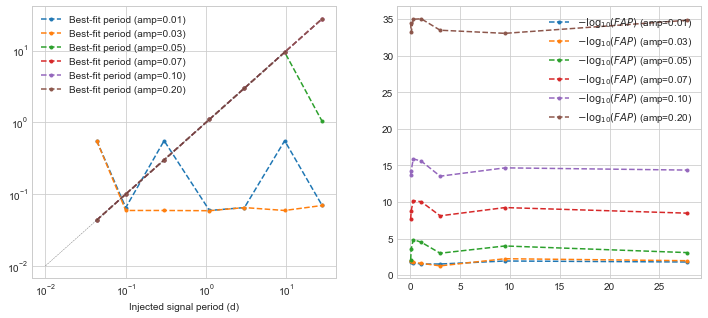

In [64]:
periods = (1/23, 0.1, 0.3, 1.1, 3, 9.5, 27.8)
# periods = np.logspace(-2, np.log10(0.25), 20)
# print(amplitudes)
# amplitude = 0

amplitudes = (0.01, 0.03, 0.05, 0.075, 0.1, 0.2)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 5))

for amp in amplitudes:

    found_period = []
    found_fap = []

    for period in periods:

        sin_mags = amp * np.sin(2*np.pi/period * times) + mags

        ls = LombScargle(times, sin_mags, dy=errs)
        power = ls.power(freq)

        min_freq = 1/100
        power[freq<min_freq] = 0

        fmax = freq[np.nanargmax(power)]
        fap = ls.false_alarm_probability(np.nanmax(power))
        print(f"Injected P={period:.2f}, A={amp:.2f}. FAP of peak: {fap:.2e}. Freq: {fmax:.3f} day^-1 (Period: {1. / fmax:.2f} days)")    

        found_period.append(1/fmax)
        found_fap.append(fap)

    ax1.plot(periods, -np.log10(found_fap), '.--', label=fr'$-\log_{{10}}(FAP)$ (amp={amp:.2f})')
    ax0.plot(periods, found_period, '.--', label=f'Best-fit period (amp={amp:.2f})')
    

ax0.plot([0.01, 10], [0.01, 10], 'k--', lw=0.5, alpha=0.5, scalex=False, scaley=False)
ax0.set_xlabel("Injected signal period (d)")
ax0.set_ylabel("")
ax0.loglog()
ax0.legend()
ax1.legend()
    

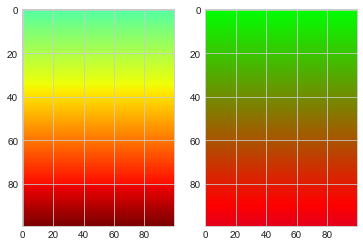

In [68]:
# Now I want to test out an "imshow" of a period, amplitude, accuracy plot.

a=np.outer(np.arange(0,1,0.01),np.ones(100))

# All of this is stolen from:
# https://stackoverflow.com/a/53754137/646549

from matplotlib import pyplot as plt
import matplotlib 
import numpy as np
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols = 2)

new_cmap1 = truncate_colormap(plt.get_cmap('jet'), 0.45, 1.0)
new_cmap2 = truncate_colormap(plt.get_cmap('brg'), 1.0, 0.45)

ax[0].imshow(a,aspect='auto', cmap = new_cmap1)
ax[1].imshow(a,aspect='auto', cmap = new_cmap2)
plt.show()

[ 0.04166667  0.07660492  0.14083954  0.25893604  0.47605861  0.87524238
  1.60914897  2.95844956  5.43916313 10.        ]
[0.01       0.01467799 0.02154435 0.03162278 0.04641589 0.06812921
 0.1        0.14677993 0.21544347 0.31622777]


Text(0.5, 0, 'Periods')

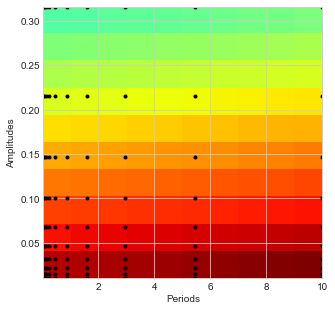

In [96]:
# x: log period
# y: log amplitude

# we'll do 10 x 10 = 100 evals.


periods = np.logspace(np.log10(1/24), 1, 10)
amplitudes = np.logspace(-2, -0.5, 10)


# (1/23, 0.1, 0.3, 1.1, 3, 9.5, 27.8)
# # periods = np.logspace(-2, np.log10(0.25), 20)
# # print(amplitudes)
# # amplitude = 0

# amplitudes = (0.01, 0.03, 0.05, 0.075, 0.1, 0.2)

fig, ax = plt.subplots(1, figsize=(5,5))

values = np.arange(100).reshape(10,10)

ax.imshow(values, 
          extent=[periods.min(), periods.max(), amplitudes.min(), amplitudes.max()], 
          aspect='auto', 
          cmap=new_cmap1)

import itertools
points = np.array(list(itertools.product(periods, amplitudes)))
ax.plot(points[:,0], points[:,1], 'k.')

print(periods)
print(amplitudes)

ax.set_ylabel("Amplitudes")
ax.set_xlabel("Periods")

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [151]:
xs = [0.5, 1.2, 2.0]
ys = [0.01, 0.05, 0.1]

import itertools
grid = np.array(list(itertools.product(xs, ys)))

X, Y = np.meshgrid(xs, ys)

zs = np.array([[0.2, 0.2, 0.2], [0., 0., 0.], [0.5, 0.7, 0.9]])

In [152]:
X, Y, zs

zs.ndim

2

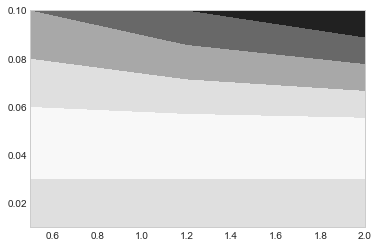

In [162]:
plt.contourf(X, Y, zs, levels=[0, 0.1, 0.3, 0.5, 0.7, 0.9])


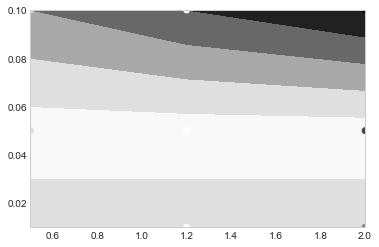

In [161]:
plt.contourf(xs, ys, zs, levels=[0, 0.1, 0.3, 0.5, 0.7, 0.9])


In [138]:
%debug

> /Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py(1564)_initialize_x_y()
   1562         """
   1563         if z.ndim != 2:
-> 1564             raise TypeError(f"Input z must be 2D, not {z.ndim}D")
   1565         elif z.shape[0] < 2 or z.shape[1] < 2:
   1566             raise TypeError(f"Input z must be at least a (2, 2) shaped array, "

ipdb> z
masked_array(
  data=[[[0.5 , 1.2 , 2.  ],
         [0.5 , 1.2 , 2.  ]],

        [[0.01, 0.01, 0.01],
         [0.1 , 0.1 , 0.1 ]]],
  mask=False,
  fill_value=1e+20)
ipdb> exit


In [131]:
grid[:,1]

array([0.01, 0.1 , 0.01, 0.1 , 0.01, 0.1 ])

In [215]:
%run ../period_recovery.py

In [221]:
from wuvars.data import spreadsheet, photometry
from wuvars.analysis.variability_selection import sq0, sq1, sq2

dat = photometry.group_wserv_v2(photometry.load_wserv_v2(8))
spread = spreadsheet.load_wserv_v2(8)

# wserv_ids = [5, 7, 8, 11]
# n_min_list = [35, 80, 55, 65]
# n_max_list = [90, 160, 80, 100]

n_min = 55
n_max = 80

# min_Stetson_list = [3, 1.6, 1.6, 4]

# SFR_names = ["Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
# SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

q0 = sq0(spread, n_min, n_max)
q1 = sq1(spread, n_min, n_max)
q2 = sq2(spread, n_min, n_max)

Loading WSERV8 photometry data... DONE (elapsed time: 0.17s)


In [267]:
q2_bright = (spread[q2]['mean']['KAPERMAG3'] < 15)
q2_bright_spread = spread[q2][q2_bright]

In [268]:
all_sids = np.unique(q2_bright_spread.index)

sids = np.random.choice(all_sids, 10)
print(sids)

[44989782481581 44989782430801 44989782481249 44989782458228
 44989782481074 44989782476636 44989782491370 44989782486244
 44989782507266 44989782463493]


In [269]:
periods = [1/23, 0.1, 0.3, 0.5, 0.7, 0.85, 1.0, 1.1, 1.2, 1.7, 2, 3, 5, 7, 9]
amplitudes = [0.01, 0.025, 0.05, 0.1, 0.2, 0.5, 1]

output2 = recovery_score(dat, sids, periods, amplitudes)

A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 0.08 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.03 mag. Correct period: 0.04 v. 0.04
A=0.05 mag. Correct period: 0.04 v. 0.04
A=0.05 mag. Correct period: 0.04 v. 0.04
A=0.05 mag. Correct period: 0.04 v. 0.04
A=0.05 mag. Correct period: 0.04 v. 0.04
A=0.05 mag. 

A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=1.00 mag. Correct period: 0.30 v. 0.30
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Incorrect period: 1.00 v. 0.50
A=0.01 mag. Incorrect period: 1.00 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Incorrect period: 0.33 v. 0.50
A=0.01 mag. Incorrect period: 1.00 v. 0.50
A=0.01 mag. Incorrect period: 1.00 v. 0.50
A=0.01 mag. Incorrect period: 1.00 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.03 mag. Correct period: 0.50 v. 0.50
A=0.03 mag. Correct period: 0.50 v. 0.50
A=0.03 mag. Incorrect period: 1.00 v. 0.50
A=0.03 mag. Correct period: 0.50 v. 0.50
A=

A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=0.50 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=1.00 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Incorrect period: 1.01 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. 

A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.20 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=0.50 mag. Correct period: 1.20 v. 1.20
A=1.00 mag. Correct period: 1.20 v. 1.20
A=1.00 mag. Correct period: 1.20 v. 1.20
A=1.00 mag. Correct period: 1.20 v. 1.20
A=1.00 mag. Correct period: 1.20 v. 1.20
A=1.00 mag. Corr

A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.10 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.20 mag. Correct period: 3.00 v. 3.00
A=0.50 mag. Correct period: 3.00 v. 3.00
A=0.50 mag. Correct period: 3.00 v. 3.00
A=0.50 mag. Correct period: 3.00 v. 3.00
A=0.50 mag. Correct period: 3.00 v. 3.00
A=0.50 mag. Corr

A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.05 mag. Correct period: 8.99 v. 9.00
A=0.05 mag. Correct period: 8.99 v. 9.00
A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.05 mag. Correct period: 9.01 v. 9.00
A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.05 mag. Correct period: 9.01 v. 9.00
A=0.05 mag. Correct period: 9.01 v. 9.00
A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 8.99 v. 9.00
A=0.10 mag. Correct period: 8.99 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.10 mag. Correct period: 9.00 v. 9.00
A=0.20 mag. Correct period: 9.00 v. 9.00
A=0.20 mag. Correct period: 9.00 v. 9.00
A=0.20 mag. Correct period: 9.00 v. 9.00
A=0.20 mag. Correct period: 9.00 v. 9.00
A=0.20 mag. Corr

In [270]:
output2

([[0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.4, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.6, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]],
 [[[0.043477134555045906,
    0.04347826874609599,
    0.045459935234475744,
    0.04347845778369087,
    0.04347789067583764,
    0.07978647719958935,
    0.043477134555045906,
    0.04347562239235753,
    0.04347770164317412,
    0.043478835863812126],
   [0.043478079710144925,
    0.04347826874609599,
    0.043478079710144925,
    0.04347826874609599,
    0.043478079710144925,
    0.043478079710144925,
    0

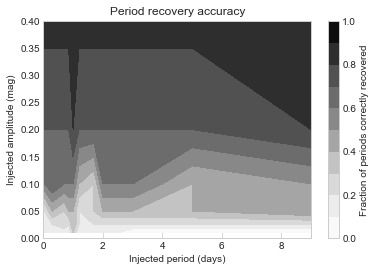

In [256]:
plt.contourf(periods, amplitudes, np.array(output[0]).T, levels=np.linspace(0,1,11))
plt.ylim(0,0.4)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,9)
cbar = plt.colorbar()
cbar.set_label("Fraction of periods correctly recovered")

In [228]:
np.array(output[0])

array([[0.33333333, 0.33333333, 0.33333333, 0.66666667, 1.        ,
        1.        ],
       [0.        , 0.33333333, 0.33333333, 0.66666667, 0.66666667,
        1.        ]])

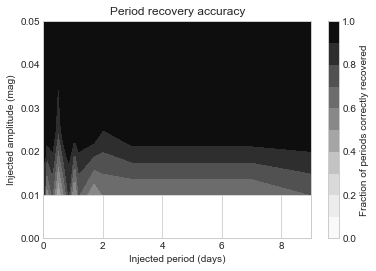

In [275]:
plt.contourf(periods, amplitudes, np.array(output2[0]).T, levels=np.linspace(0,1,11))
plt.ylim(0,0.05)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,9)
cbar = plt.colorbar()
cbar.set_label("Fraction of periods correctly recovered")

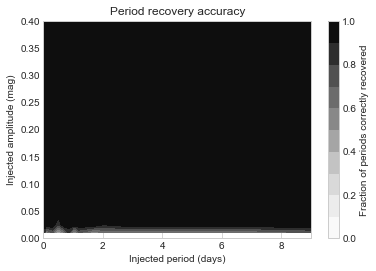

In [274]:
plt.contourf(periods, amplitudes, np.array(output2[0]).T, levels=np.linspace(0,1,11))
plt.ylim(0,0.4)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,9)
cbar = plt.colorbar()
cbar.set_label("Fraction of periods correctly recovered")

In [277]:
periods3 = [1/23, 0.1, 0.3, 0.5, 0.7, 0.85, 1.0, 1.1, 1.2, 1.7, 2, 3, 5, 7, 9]
amplitudes3 = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075]

output3 = recovery_score(dat, sids, periods3, amplitudes3)

A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. Incorrect period: 0.99 v. 0.04
A=0.01 mag. Incorrect period: 0.06 v. 0.04
A=0.01 mag. Incorrect period: 0.08 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.98 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Corre

A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.04 mag. Correct period: 0.30 v. 0.30
A=0.05 mag. Correct period: 0.30 v. 0.30
A=0.05 mag. Corr

A=0.07 mag. Correct period: 0.70 v. 0.70
A=0.07 mag. Correct period: 0.70 v. 0.70
A=0.07 mag. Correct period: 0.70 v. 0.70
A=0.07 mag. Correct period: 0.70 v. 0.70
A=0.07 mag. Correct period: 0.70 v. 0.70
A=0.00 mag. Incorrect period: 0.04 v. 0.85
A=0.00 mag. Incorrect period: 0.25 v. 0.85
A=0.00 mag. Incorrect period: 1.00 v. 0.85
A=0.00 mag. Incorrect period: 1.00 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.08 v. 0.85
A=0.00 mag. Incorrect period: 0.04 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Incorrect period: 0.46 v. 0.85
A=0.01 mag. Incorrect period: 1.00 v. 0.85
A=0.01 mag. Incorrect period: 1.00 v. 0.85
A=0.01 mag. Incorrect period: 0.07 v. 0.85
A=0.01 mag. Incorrect period: 0.08 v. 0.85
A=0.01 mag. Incorrect period: 0.07 v. 0.85
A=0.01 mag. Incorrect period: 0.25 v. 0.85
A=0.01 mag. Incorrect p

A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.02 mag. Incorrect period: 0.52 v. 1.10
A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.02 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.03 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Correct period: 1.10 v. 1.10
A=0.04 mag. Co

A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.07 mag. Correct period: 1.70 v. 1.70
A=0.00 mag. Incorrect period: 0.04 v. 2.00
A=0.00 mag. Incorrect period: 0.25 v. 2.00
A=0.00 mag. Incorrect period: 1.00 v. 2.00
A=0.00 mag. Incorrect period: 0.99 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.08 v. 2.00
A=0.00 mag. Incorrect period: 0.04 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.01 mag. Incorrect period: 0.18 v. 2.00
A=0.01 mag. Incorrect period: 0.67 v. 2.00
A=0.01 mag. Incorrect period: 0.06 v. 2.00
A=0.01 mag. Incorrect period: 0

A=0.01 mag. Correct period: 5.02 v. 5.00
A=0.01 mag. Correct period: 5.02 v. 5.00
A=0.01 mag. Incorrect period: 1.24 v. 5.00
A=0.02 mag. Correct period: 5.00 v. 5.00
A=0.02 mag. Correct period: 5.00 v. 5.00
A=0.02 mag. Incorrect period: 1.25 v. 5.00
A=0.02 mag. Correct period: 5.00 v. 5.00
A=0.02 mag. Correct period: 4.99 v. 5.00
A=0.02 mag. Correct period: 4.99 v. 5.00
A=0.02 mag. Correct period: 5.00 v. 5.00
A=0.02 mag. Correct period: 5.01 v. 5.00
A=0.02 mag. Correct period: 5.01 v. 5.00
A=0.02 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 4.99 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.03 mag. Correct period: 5.00 v. 5.00
A=0.04 mag. Correct period: 5.00 v. 5.00
A=0.04 mag. 

A=0.05 mag. Correct period: 9.01 v. 9.00
A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.05 mag. Correct period: 9.01 v. 9.00
A=0.05 mag. Correct period: 9.01 v. 9.00
A=0.05 mag. Correct period: 9.00 v. 9.00
A=0.07 mag. Correct period: 9.00 v. 9.00
A=0.07 mag. Correct period: 9.00 v. 9.00
A=0.07 mag. Correct period: 8.99 v. 9.00
A=0.07 mag. Correct period: 8.99 v. 9.00
A=0.07 mag. Correct period: 9.00 v. 9.00
A=0.07 mag. Correct period: 9.01 v. 9.00
A=0.07 mag. Correct period: 9.00 v. 9.00
A=0.07 mag. Correct period: 9.01 v. 9.00
A=0.07 mag. Correct period: 9.00 v. 9.00
A=0.07 mag. Correct period: 9.00 v. 9.00


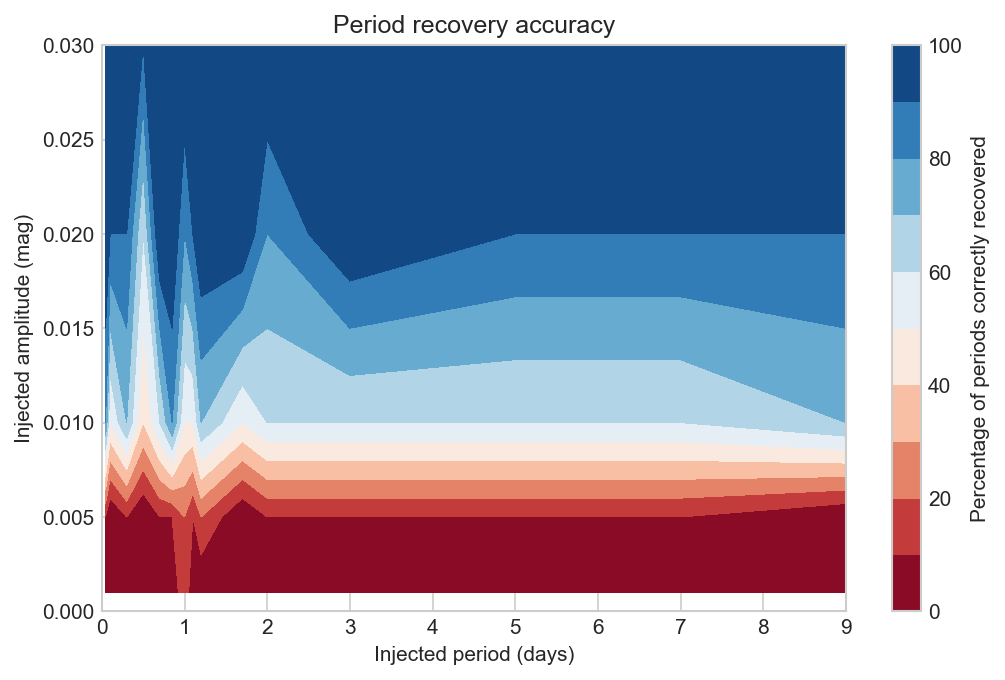

In [288]:
fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods3, amplitudes3, 100*np.array(output3[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,9)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")
cbar

In [294]:
periods4 = [1/23, 1/11, 1/7, 0.3, 0.5, 0.7, 0.85, 1.0, 1.1, 1.2, 1.7, 2, 3.07, 5.07, 6.11]
amplitudes4 = [0.001, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05]

output4 = recovery_score(dat, sids, periods4, amplitudes4)

A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. I

A=0.03 mag. Correct period: 0.09 v. 0.09
A=0.03 mag. Correct period: 0.09 v. 0.09
A=0.03 mag. Correct period: 0.09 v. 0.09
A=0.03 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.04 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.05 mag. Correct period: 0.09 v. 0.09
A=0.00 mag. Inco

A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Incorrect period: 0.43 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.02 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Co

A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Incorrect period: 2.34 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Incorrect period: 2.44 v. 0.70
A=0.01 mag. Incorrect period: 0.08 v. 0.70
A=0.01 mag. Incorrect period: 2.35 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Incorrect period: 2.35 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Incorrect period: 2.35 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.01 mag. Correct period: 0.70 v. 0.70
A=0.02 mag. Correct period: 0.70 v. 0.70
A=0.02 mag. Correct period: 0.70 v. 0.70
A=0.02 mag. Correct period: 0.70 v. 0.70
A=0.

A=0.00 mag. Incorrect period: 0.05 v. 1.00
A=0.00 mag. Incorrect period: 0.05 v. 1.00
A=0.00 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Correct period: 1.01 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.06 v. 1.00
A=0.01 mag. Incorrect period: 0.08 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 1.01 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.06 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.33 v. 1.00
A=0.01 mag. Incorre

A=0.05 mag. Correct period: 1.10 v. 1.10
A=0.05 mag. Correct period: 1.10 v. 1.10
A=0.05 mag. Correct period: 1.10 v. 1.10
A=0.05 mag. Correct period: 1.10 v. 1.10
A=0.05 mag. Correct period: 1.10 v. 1.10
A=0.05 mag. Correct period: 1.10 v. 1.10
A=0.00 mag. Incorrect period: 0.04 v. 1.20
A=0.00 mag. Incorrect period: 0.25 v. 1.20
A=0.00 mag. Incorrect period: 1.00 v. 1.20
A=0.00 mag. Incorrect period: 1.00 v. 1.20
A=0.00 mag. Incorrect period: 0.05 v. 1.20
A=0.00 mag. Incorrect period: 0.08 v. 1.20
A=0.00 mag. Incorrect period: 0.04 v. 1.20
A=0.00 mag. Incorrect period: 0.05 v. 1.20
A=0.00 mag. Incorrect period: 0.05 v. 1.20
A=0.00 mag. Incorrect period: 0.05 v. 1.20
A=0.00 mag. Incorrect period: 0.04 v. 1.20
A=0.00 mag. Incorrect period: 0.06 v. 1.20
A=0.00 mag. Incorrect period: 1.00 v. 1.20
A=0.00 mag. Incorrect period: 1.00 v. 1.20
A=0.00 mag. Incorrect period: 0.08 v. 1.20
A=0.00 mag. Incorrect period: 0.08 v. 1.20
A=0.00 mag. Incorrect period: 0.50 v. 1.20
A=0.00 mag. Incorrect p

A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.03 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.04 mag. Correct period: 1.70 v. 1.70
A=0.05 mag. Correct period: 1.70 v. 1.70
A=0.05 mag. Correct period: 1.70 v. 1.70
A=0.05 mag. Correct period: 1.70 v. 1.70
A=0.05 mag. Correct period: 1.70 v. 1.70
A=0.05 mag. Corr

A=0.01 mag. Incorrect period: 0.75 v. 3.07
A=0.01 mag. Correct period: 3.07 v. 3.07
A=0.01 mag. Correct period: 3.07 v. 3.07
A=0.01 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Incorrect period: 0.75 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.02 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. Correct period: 3.07 v. 3.07
A=0.03 mag. 

A=0.01 mag. Incorrect period: 0.99 v. 6.11
A=0.01 mag. Incorrect period: 0.04 v. 6.11
A=0.01 mag. Incorrect period: 0.07 v. 6.11
A=0.01 mag. Incorrect period: 0.55 v. 6.11
A=0.01 mag. Incorrect period: 0.05 v. 6.11
A=0.01 mag. Incorrect period: 0.86 v. 6.11
A=0.01 mag. Incorrect period: 0.86 v. 6.11
A=0.01 mag. Correct period: 6.11 v. 6.11
A=0.01 mag. Incorrect period: 1.19 v. 6.11
A=0.01 mag. Incorrect period: 0.86 v. 6.11
A=0.01 mag. Correct period: 6.05 v. 6.11
A=0.01 mag. Incorrect period: 0.04 v. 6.11
A=0.01 mag. Incorrect period: 0.07 v. 6.11
A=0.01 mag. Incorrect period: 0.32 v. 6.11
A=0.01 mag. Incorrect period: 0.07 v. 6.11
A=0.01 mag. Incorrect period: 0.86 v. 6.11
A=0.01 mag. Correct period: 6.08 v. 6.11
A=0.01 mag. Correct period: 6.11 v. 6.11
A=0.01 mag. Correct period: 6.10 v. 6.11
A=0.01 mag. Correct period: 6.11 v. 6.11
A=0.01 mag. Correct period: 6.07 v. 6.11
A=0.01 mag. Incorrect period: 0.04 v. 6.11
A=0.01 mag. Correct period: 6.10 v. 6.11
A=0.01 mag. Incorrect perio

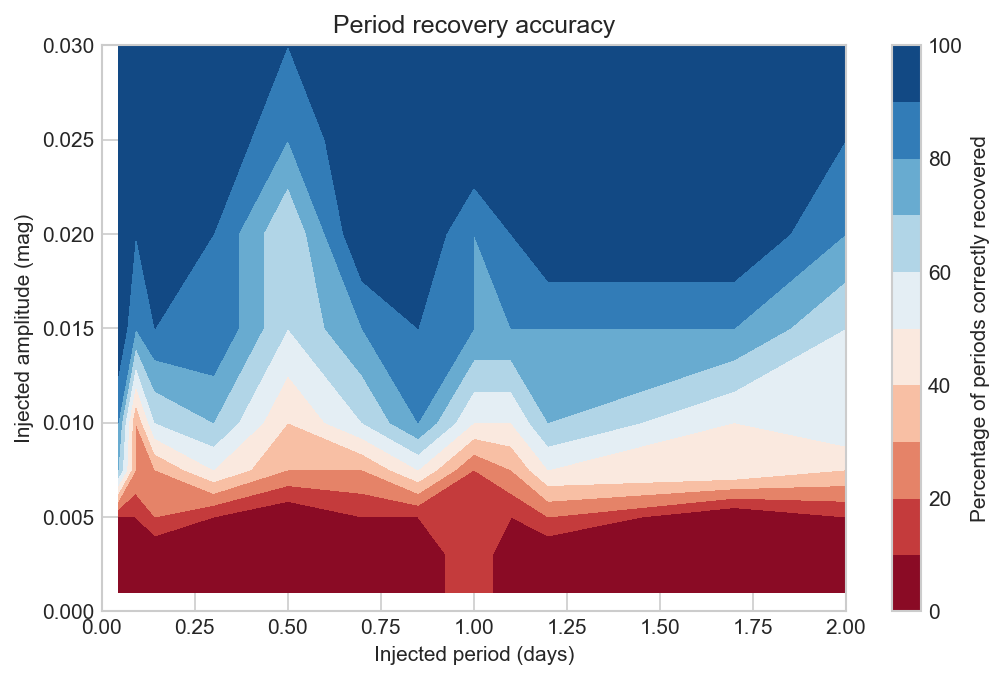

In [297]:
fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods4, amplitudes4, 100*np.array(output4[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,2)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")


In [298]:
periods5 = [1/23, 1/17, 1/11, 1/7, 0.307, 0.407, 0.507, 0.607, 0.707, 0.807, 0.907, 1.0, 1.107, 1.207, 1.5, 1.707, 2, 2.207, 3.07, 5.07, 6.11]
amplitudes5 = [0.001, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04]

output5 = recovery_score(dat, sids, periods5, amplitudes5)

A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. I

A=0.04 mag. Correct period: 0.06 v. 0.06
A=0.04 mag. Correct period: 0.06 v. 0.06
A=0.04 mag. Correct period: 0.06 v. 0.06
A=0.00 mag. Incorrect period: 0.04 v. 0.09
A=0.00 mag. Incorrect period: 0.48 v. 0.09
A=0.00 mag. Incorrect period: 1.00 v. 0.09
A=0.00 mag. Incorrect period: 1.00 v. 0.09
A=0.00 mag. Incorrect period: 0.05 v. 0.09
A=0.00 mag. Incorrect period: 0.08 v. 0.09
A=0.00 mag. Incorrect period: 0.04 v. 0.09
A=0.00 mag. Incorrect period: 0.05 v. 0.09
A=0.00 mag. Incorrect period: 0.05 v. 0.09
A=0.00 mag. Incorrect period: 0.05 v. 0.09
A=0.00 mag. Incorrect period: 0.04 v. 0.09
A=0.00 mag. Incorrect period: 0.92 v. 0.09
A=0.00 mag. Incorrect period: 1.00 v. 0.09
A=0.00 mag. Incorrect period: 1.00 v. 0.09
A=0.00 mag. Incorrect period: 0.06 v. 0.09
A=0.00 mag. Incorrect period: 0.10 v. 0.09
A=0.00 mag. Incorrect period: 0.04 v. 0.09
A=0.00 mag. Incorrect period: 0.05 v. 0.09
A=0.00 mag. Incorrect period: 1.14 v. 0.09
A=0.00 mag. Incorrect period: 0.17 v. 0.09
A=0.01 mag. Incor

A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.04 mag. Correct period: 0.14 v. 0.14
A=0.00 mag. Incorrect period: 0.04 v. 0.31
A=0.00 mag. Incorrect period: 0.25 v. 0.31
A=0.00 mag. Incorrect period: 1.00 v. 0.31
A=0.00 mag. Incorrect period: 1.00 v. 0.31
A=0.00 mag. Incorrect period: 0.05 v. 0.31
A=0.00 mag. Incorrect period: 0.08 v. 0.31
A=0.00 mag. Incorrect period: 0.04 v. 0.31
A=0.00 mag. Incorrect period: 0.05 v. 0.31
A=0.00 mag. Incorrect period: 0.05 v. 0.31
A=0.00 mag. Incorrect period: 0.05 v. 0.31
A=0.00 mag. Incorrect period: 0.04 v. 0.31
A=0.00 mag. Incorrect period: 0.13 v. 0.31
A=0.00 mag. Incorrect period: 1.00 v. 0.31
A=0.00 mag. Incorrect period: 1.00 v. 0.31
A=0.00 mag. Incorrect period: 0.04 v. 0.31
A=0.00 mag. Incorrect period: 0.08 v. 0.31
A=0.00 mag. Incorrect per

A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.04 mag. Correct period: 0.41 v. 0.41
A=0.00 mag. Incorrect period: 0.04 v. 0.51
A=0.00 mag. Incorrect period: 0.25 v. 0.51
A=0.00 mag. Incorrect period: 1.00 v. 0.51
A=0.00 mag. Incorrect period: 1.00 v. 0.51
A=0.00 mag. Incorrect period: 0.05 v. 0.51
A=0.00 mag. Incorrect period: 0.08 v. 0.51
A=0.00 mag. Incorrect period: 0.04 v. 0.51
A=0.00 mag. Incorrect period: 0.05 v. 0.51
A=0.00 mag. Incorrect period: 0.05 v. 0.51
A=0.00 mag. Incorrect period: 0.05 v. 0.51
A=0.00 mag. Incorrect period: 0.04 v. 0.51
A=0.00 mag. Incorrect period: 1.01 v. 0.51
A=0.00 mag. Incorrect period: 1.0

A=0.03 mag. Correct period: 0.61 v. 0.61
A=0.03 mag. Correct period: 0.61 v. 0.61
A=0.03 mag. Correct period: 0.61 v. 0.61
A=0.03 mag. Correct period: 0.61 v. 0.61
A=0.03 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.04 mag. Correct period: 0.61 v. 0.61
A=0.00 mag. Incorrect period: 0.04 v. 0.71
A=0.00 mag. Incorrect period: 0.25 v. 0.71
A=0.00 mag. Incorrect period: 1.00 v. 0.71
A=0.00 mag. Incorrect period: 1.00 v. 0.71
A=0.00 mag. Incorrect period: 0.05 v. 0.71
A=0.00 mag. Incorrect period: 0.08 v. 0.71
A=0.00 mag. Incorrect period: 0.04 v. 0.71
A=0.00 mag. Incorrect period: 0.05 v. 0.71
A=0.00 mag. Incorrect period: 0.05 v. 0.7

A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.03 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.04 mag. Correct period: 0.81 v. 0.81
A=0.00 mag. Incorrect period: 0.04 v. 0.91
A=0.00 mag. Incorrect period: 0.13 v. 0.91
A=0.00 mag. Incorrect period: 1.00 v. 0.91
A=0.00 mag. Incorrect period: 1.00 v. 0.91
A=0.00 mag. Incorrect period: 0.05 v. 0.91
A=0.00

A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.04 mag. Correct period: 1.00 v. 1.00
A=0.00 mag. Incorrect period: 0.04 v. 1.11
A=0.00 mag. In

A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.03 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Correct period: 1.21 v. 1.21
A=0.04 mag. Corr

A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.03 mag. Correct period: 1.71 v. 1.71
A=0.04 mag. Correct period: 1.71 v. 1.71
A=0.04 mag. Correct period: 1.71 v. 1.71
A=0.04 mag. Correct period: 1.71 v. 1.71
A=0.04 mag. Correct period: 1.71 v. 1.71
A=0.04 mag. Corr

A=0.02 mag. Incorrect period: 0.69 v. 2.21
A=0.02 mag. Correct period: 2.21 v. 2.21
A=0.02 mag. Correct period: 2.21 v. 2.21
A=0.02 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Incorrect period: 0.69 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.04 mag. 

A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.02 mag. Correct period: 5.08 v. 5.07
A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.02 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.08 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Correct period: 5.07 v. 5.07
A=0.03 mag. Corr

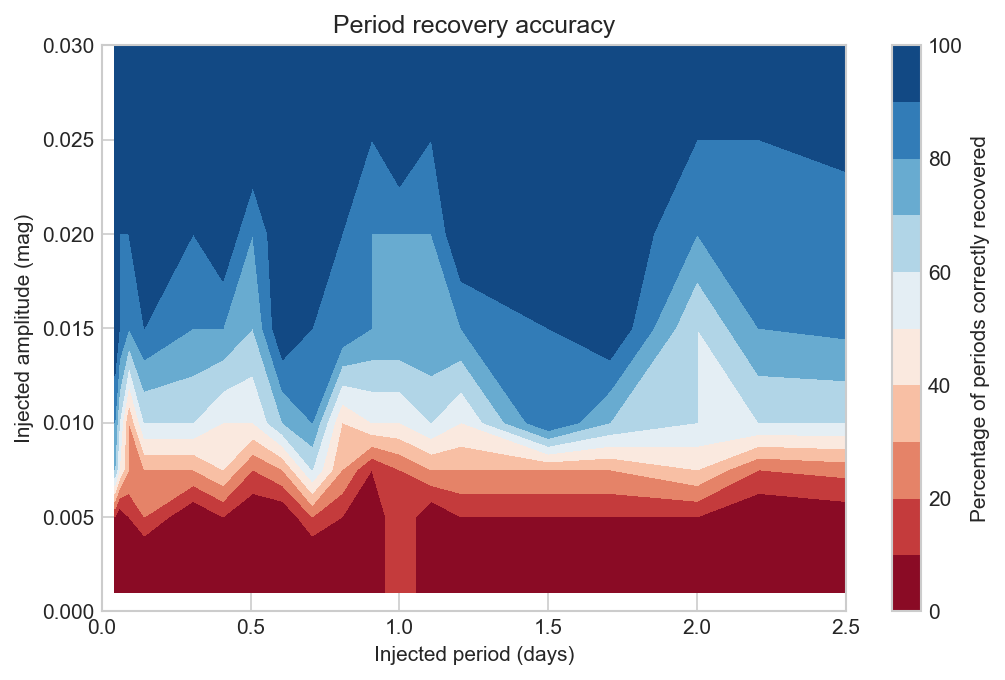

In [301]:
fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods5, amplitudes5, 100*np.array(output5[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,2.5)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")


In [302]:
from datetime import datetime

startTime = datetime.now()
print(f"Starting at: {startTime}")

periods6 = [1/23, 1/17, 1/11, 0.1, 1/7, 0.25, 0.307, 0.35, 0.407, 0.45, 0.507, 0.607, 0.707, 0.807, 0.907, 1.0, 1.107, 1.207, 1.3507, 1.5, 1.707, 2, 2.1, 2.207, 2.5, 3.07, 5.07]
amplitudes6 = [0.001, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03]

output6 = recovery_score(dat, sids, periods6, amplitudes6)

print(f"elapsed time: ", datetime.now() - startTime)


Starting at: 2021-07-22 12:57:46.054525
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.25 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. Correct period: 0.04 v. 0.04
A=0.01 mag. Inco

A=0.00 mag. Incorrect period: 0.10 v. 0.09
A=0.00 mag. Incorrect period: 0.04 v. 0.09
A=0.00 mag. Incorrect period: 0.05 v. 0.09
A=0.00 mag. Incorrect period: 1.14 v. 0.09
A=0.00 mag. Incorrect period: 0.17 v. 0.09
A=0.01 mag. Incorrect period: 0.04 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.07 v. 0.09
A=0.01 mag. Incorrect period: 0.11 v. 0.09
A=0.01 mag. Incorrect period: 0.06 v. 0.09
A=0.01 mag. Incorrect period: 0.10 v. 0.09
A=0.01 mag. Incorrect period: 0.04 v. 0.09
A=0.01 mag. Incorrect period: 0.06 v. 0.09
A=0.01 mag. Incorrect period: 1.14 v. 0.09
A=0.01 mag. Incorrect period: 0.11 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.07 v. 0.09
A=0.01 mag. Incorrect period: 0.11 v. 0.09
A=0.01 mag. Incorrect period: 0.06 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.11 v. 0.09
A=0.01 mag. Incorrect period: 0.10 v. 0.09
A=0.01 mag. Incorre

A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Incorrect period: 1.00 v. 0.14
A=0.01 mag. Incorrect period: 0.99 v. 0.14
A=0.01 mag. Incorrect period: 0.11 v. 0.14
A=0.01 mag. Incorrect period: 0.11 v. 0.14
A=0.01 mag. Incorrect period: 0.50 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Incorrect period: 0.12 v. 0.14
A=0.01 mag. Incorrect period: 0.17 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Incorrect period: 1.00 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Incorrect period: 0.11 v. 0.14
A=0.01 mag. Incorrect period: 0.11 v. 0.14
A=0.01 mag. Incorrect period: 0.33 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v. 0.14
A=0.01 mag. Correct period: 0.14 v.

A=0.01 mag. Incorrect period: 0.44 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Incorrect period: 0.23 v. 0.31
A=0.01 mag. Incorrect period: 0.44 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.01 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Incorrect period: 0.44 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 mag. Correct period: 0.31 v. 0.31
A=0.02 m

A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.02 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Correct period: 0.41 v. 0.41
A=0.03 mag. Corr

A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.03 mag. Correct period: 0.51 v. 0.51
A=0.00 mag. Incorrect period: 0.04 v. 0.61
A=0.00 mag. Incorrect period: 0.13 v. 0.61
A=0.00 mag. Incorrect period: 1.00 v. 0.61
A=0.00 mag. Incorrect period: 1.00 v. 0.61
A=0.00 mag. Incorrect period: 0.05 v. 0.61
A=0.00 mag. Incorrect period: 0.08 v. 0.61
A=0.00 mag. Incorrect period: 0.04 v. 0.61
A=0.00 mag. Incorrect period: 0.98 v. 0.61
A=0.00 mag. Incorrect period: 0.05 v. 0.61
A=0.00 mag. Incorrect period: 0.05 v. 0.61
A=0.00 mag. Incorrect period: 0.04 v.

A=0.00 mag. Incorrect period: 1.00 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.00 mag. Incorrect period: 0.08 v. 0.81
A=0.00 mag. Incorrect period: 0.04 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.00 mag. Incorrect period: 0.04 v. 0.81
A=0.00 mag. Incorrect period: 0.13 v. 0.81
A=0.00 mag. Incorrect period: 1.00 v. 0.81
A=0.00 mag. Incorrect period: 1.00 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.00 mag. Incorrect period: 0.08 v. 0.81
A=0.00 mag. Incorrect period: 0.04 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.00 mag. Incorrect period: 0.06 v. 0.81
A=0.00 mag. Incorrect period: 0.05 v. 0.81
A=0.01 mag. Correct period: 0.81 v. 0.81
A=0.01 mag. Incorrect period: 0.13 v. 0.81
A=0.01 mag. Incorrect period: 0.14 v. 0.81
A=0.01 mag. Incorrect period: 1.00 v. 0.81
A=0.01 mag. Incorrect period: 0.05 v. 0.81
A=0.01 mag. Incorrect period: 0.08 v. 0.81
A=0.01 mag. I

A=0.00 mag. Incorrect period: 0.05 v. 1.00
A=0.00 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Correct period: 1.01 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.06 v. 1.00
A=0.01 mag. Incorrect period: 0.08 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 1.01 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.06 v. 1.00
A=0.01 mag. Incorrect period: 0.50 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.33 v. 1.00
A=0.01 mag. Incorrect period: 1.01 v. 1.00
A=0.01 mag. Correct

A=0.01 mag. Incorrect period: 1.00 v. 1.21
A=0.01 mag. Incorrect period: 0.05 v. 1.21
A=0.01 mag. Incorrect period: 0.18 v. 1.21
A=0.01 mag. Incorrect period: 0.55 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Incorrect period: 0.55 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Incorrect period: 0.55 v. 1.21
A=0.01 mag. Incorrect period: 5.84 v. 1.21
A=0.01 mag. Incorrect period: 0.10 v. 1.21
A=0.01 mag. Incorrect period: 0.55 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Incorrect period: 0.55 v. 1.21
A=0.01 mag. Correct period: 1.21 v. 1.21
A=0.01 mag. Incorrect period: 0.55 v. 1.21
A=0.01 mag. Correct period: 1.21 v.

A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Incorrect period: 0.60 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.01 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.02 mag. Correct period: 1.50 v. 1.50
A=0.03 mag. Correct period: 1.50 v. 1.50
A=0.03 mag. Correct period: 1.50 v. 1.50
A=0.03 mag. Correct period: 1.50 v. 1.50
A=0.03 mag. Co

A=0.02 mag. Correct period: 2.00 v. 2.00
A=0.02 mag. Correct period: 2.00 v. 2.00
A=0.02 mag. Incorrect period: 0.67 v. 2.00
A=0.02 mag. Correct period: 2.00 v. 2.00
A=0.02 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Incorrect period: 0.67 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. 

A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.03 mag. Correct period: 2.21 v. 2.21
A=0.00 mag. Incorrect period: 0.04 v. 2.50
A=0.00 mag. Incorrect period: 0.25 v. 2.50
A=0.00 mag. Incorrect period: 1.00 v. 2.50
A=0.00 mag. Incorrect period: 1.00 v. 2.50
A=0.00 mag. Incorrect period: 0.05 v. 2.50
A=0.00 mag. Incorrect period: 0.08 v. 2.50
A=0.00 mag. Incorrect period: 0.04 v. 2.50
A=0.00 mag. Incorrect period: 0.05 v. 2.50
A=0.00 mag. Incorrect period: 0.05 v. 2.50
A=0.00 mag. Incorrect period: 0.05 v. 2.50
A=0.00 mag. Incorrect period: 0.04 v. 2.50
A=0.00 mag. Incorrect period: 0.48 v. 2.50
A=0.00 mag. Incorrect period: 1.00 v. 2.50
A=0.00 mag. Incorrect period: 1.00 v. 2.50
A=0.00 mag. Incorrect period:

A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.00 mag. Incorrect period: 0.04 v. 5.07
A=0.00 mag. Incorrect period: 0.13 v. 5.07
A=0.00 mag. Incorrect period: 1.00 v. 5.07
A=0.00 mag. Incorrect period: 1.00 v. 5.07
A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.00 mag. Incorrect period: 0.08 v. 5.07
A=0.00 mag. Incorrect period: 0.04 v. 5.07
A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.00 mag. Incorrect period: 0.05 v. 5.07
A=0.01 mag. Incorrect period: 0.04 v. 5.07
A=0.01 mag. Incorrect period: 0.13 v. 5.07
A=0.01 mag. Incorrect period: 0.83 v. 5.07
A=0.01 mag. Incorrect period: 1.00 v. 5.07
A=0.01 mag. Incorrect period: 0.84 v. 5.07
A=0.01 mag. Incorrect period: 0.08 v. 5.07
A=0.01 mag. Incorrect period: 0.04 v. 5.07
A=0.01 mag. Incorrect period: 0.05 v. 5.07
A=0.01 mag. Incorrect period: 0.04 v. 5.07
A=0.01 mag. Incorrect period: 0.08 v. 5.07
A=0.01 mag.

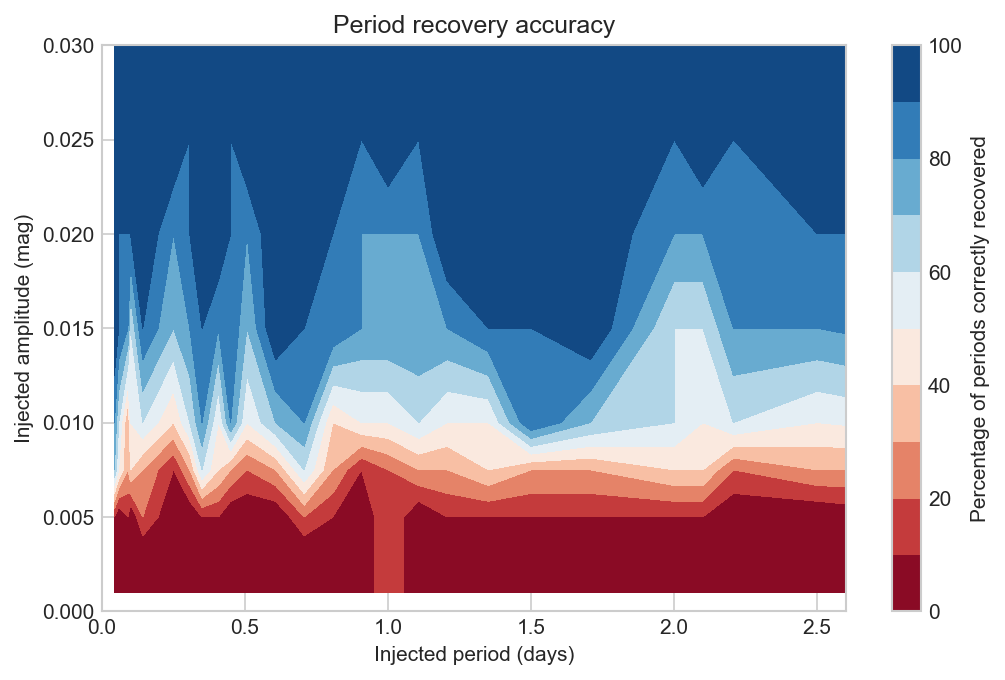

In [304]:
fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods6, amplitudes6, 100*np.array(output6[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.xlim(0,2.6)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")


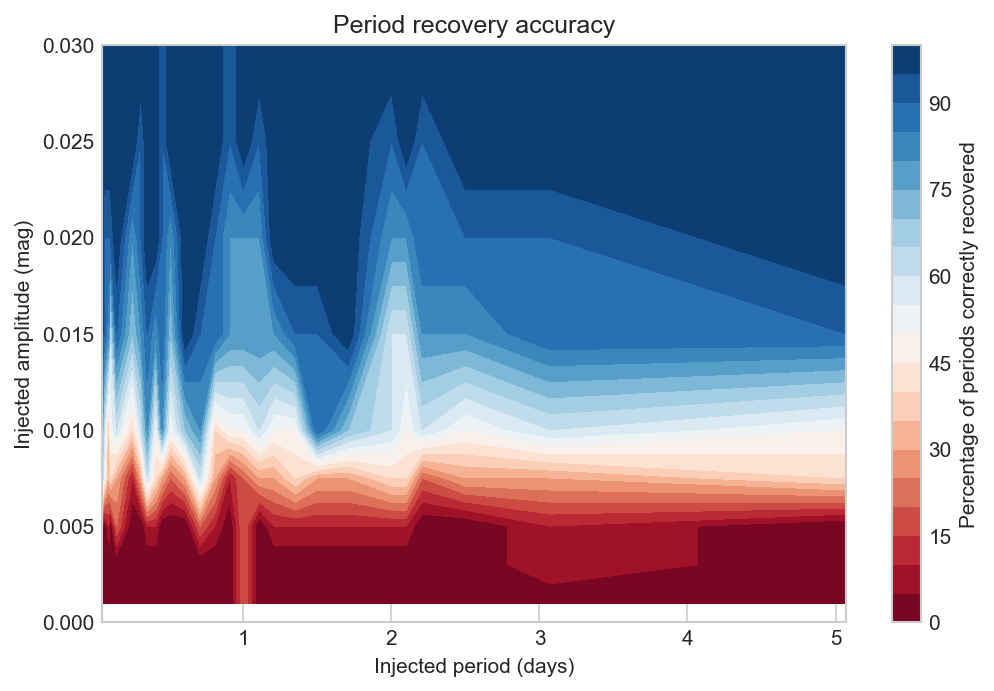

In [310]:
plt.style.use('seaborn-whitegrid')


fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods6, amplitudes6, 100*np.array(output6[0]).T, levels=100*np.linspace(0,1,21), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
# plt.xlim(0,2.6)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")


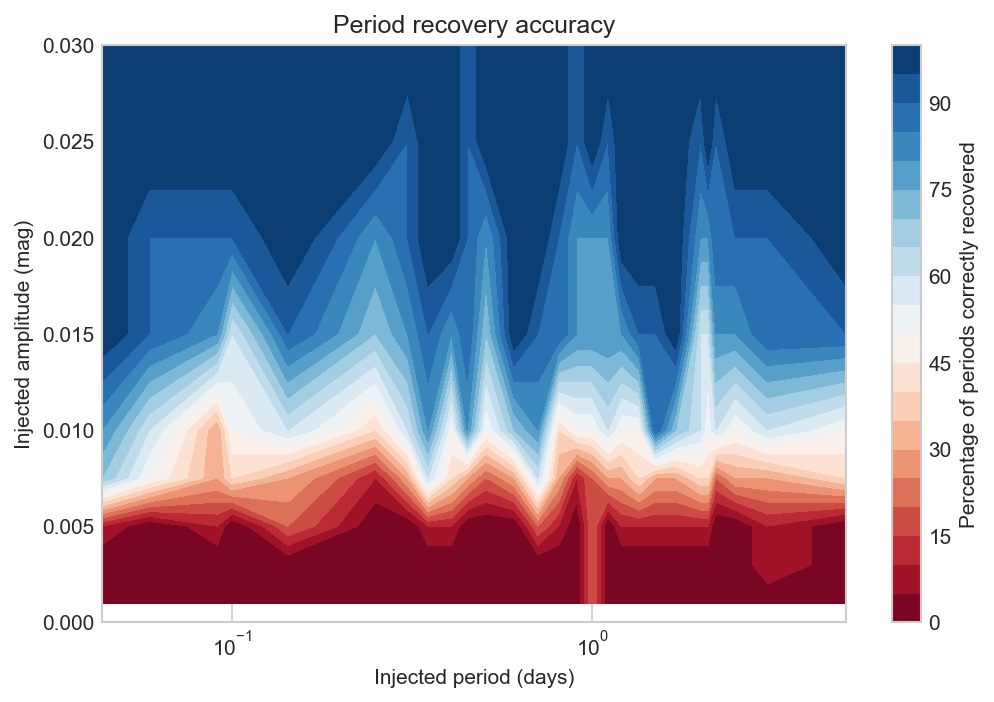

In [314]:
plt.style.use('seaborn-whitegrid')


fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods6, amplitudes6, 100*np.array(output6[0]).T, levels=100*np.linspace(0,1,21), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title("Period recovery accuracy")
plt.semilogx()
plt.xlim(None,None)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")


In [315]:
X, Y = np.meshgrid(periods6, amplitudes6)

27

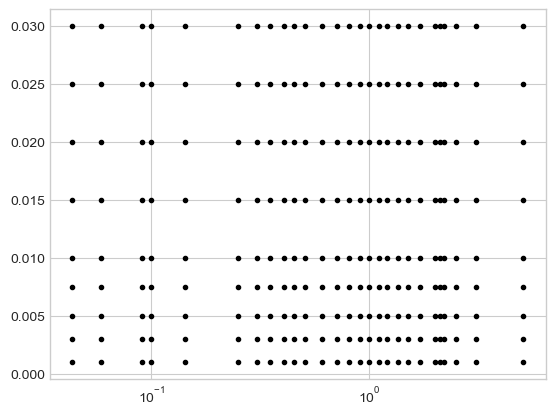

In [318]:
plt.plot(X, Y, 'k.')
plt.semilogx()

len(periods6)

[]

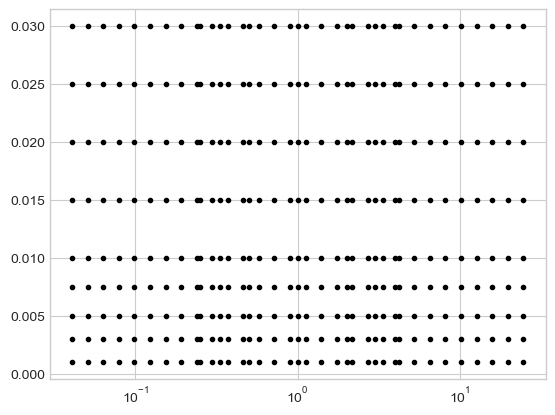

In [331]:
periods7 = np.logspace(np.log10(1/24.5), np.log10(24.5), 30)

extra_periods = (1/4, 1/3, 1/2, 1, 2, 3, 4)

periods7_append_sorted = np.sort(np.append(periods7, np.array(extra_periods)))

X7, Y7 = np.meshgrid(periods7_append_sorted, amplitudes6)

plt.plot(X7, Y7, 'k.')
plt.semilogx()

In [341]:
print(periods7)
print(periods7_append_sorted)

[ 0.04081633  0.05089071  0.06345167  0.07911295  0.09863979  0.12298629
  0.15334205  0.19119028  0.23838031  0.29721788  0.37057788  0.46204476
  0.5760877   0.71827899  0.89556626  1.11661197  1.39221669  1.7358468
  2.16429248  2.69848811  3.36453512  4.19497739  5.23039131  6.52136847
  8.13098756 10.13789653 12.64015536 15.76002744 19.64995349 24.5       ]
[ 0.04081633  0.05089071  0.06345167  0.07911295  0.09863979  0.12298629
  0.15334205  0.19119028  0.23838031  0.25        0.29721788  0.33333333
  0.37057788  0.46204476  0.5         0.5760877   0.71827899  0.89556626
  1.          1.11661197  1.39221669  1.7358468   2.          2.16429248
  2.69848811  3.          3.36453512  4.          4.19497739  5.23039131
  6.52136847  8.13098756 10.13789653 12.64015536 15.76002744 19.64995349
 24.5       ]


In [346]:
startTime = datetime.now()
print(f"Starting at: {startTime}")

amplitudes7 = amplitudes6
output7 = recovery_score(dat, sids, periods7_append_sorted, amplitudes7)

print(f"elapsed time: ", datetime.now() - startTime)


Starting at: 2021-07-22 14:58:36.128534
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.13 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.98 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.13 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.08 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.09 v. 0.04
A=0.00 mag. Incorrect period: 0.06 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.07 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. In

A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.08 v. 0.06
A=0.00 mag. Incorrect period: 0.04 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.17 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Incorrect period: 0.25 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Incorrect period: 0.11 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Incorrect period: 0.08 v. 0.06
A=0.01 mag. Incorrect period: 0.32 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.07 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.07 v. 0.06
A=0.01 mag. C

A=0.01 mag. Incorrect period: 0.08 v. 0.10
A=0.01 mag. Incorrect period: 0.06 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 0.99 v. 0.10
A=0.01 mag. Incorrect period: 1.00 v. 0.10
A=0.01 mag. Incorrect period: 0.06 v. 0.10
A=0.01 mag. Incorrect period: 0.18 v. 0.10
A=0.01 mag. Incorrect period: 0.09 v. 0.10
A=0.01 mag. Incorrect period: 0.09 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 0.11 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 1.00 v. 0.10
A=0.01 mag. Incorrect period: 1.00 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 0.11 v. 0.10
A=0.01 mag. Incorrect period: 0.09 v. 0.10
A=0.01 mag. Incorrect period: 0.09 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 0.11 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period:

A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.05 v. 0.15
A=0.01 mag. Incorrect period: 0.09 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.18 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.18 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.18 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02

A=0.01 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.02 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Correct period: 0.24 v. 0.24
A=0.03 mag. Corr

A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.03 mag. Correct period: 0.30 v. 0.30
A=0.00 mag. Incorrect period: 0.04 v. 0.33
A=0.00 mag. Incorrect period: 0.13 v. 0.33
A=0.00 mag. Incorrect period: 1.00 v. 0.33
A=0.00 mag. Incorrect period: 1.00 v. 0.33
A=0.00 mag. Incorrect period: 0.05 v. 0.33
A=0.00 mag. Incorrect period: 0.08 v. 0.33
A=0.00 mag. Incorrect period: 0.04 v. 0.33
A=0.00 mag. Incorrect period: 0.05 v. 0.33
A=0.00 mag. Incorrect period: 0.05 v. 0.3

A=0.00 mag. Incorrect period: 0.25 v. 0.46
A=0.00 mag. Incorrect period: 1.00 v. 0.46
A=0.00 mag. Incorrect period: 1.00 v. 0.46
A=0.00 mag. Incorrect period: 0.05 v. 0.46
A=0.00 mag. Incorrect period: 0.08 v. 0.46
A=0.00 mag. Incorrect period: 0.04 v. 0.46
A=0.00 mag. Incorrect period: 0.98 v. 0.46
A=0.00 mag. Incorrect period: 0.05 v. 0.46
A=0.00 mag. Incorrect period: 0.05 v. 0.46
A=0.00 mag. Incorrect period: 0.04 v. 0.46
A=0.00 mag. Incorrect period: 1.01 v. 0.46
A=0.00 mag. Incorrect period: 1.00 v. 0.46
A=0.00 mag. Incorrect period: 0.99 v. 0.46
A=0.00 mag. Incorrect period: 0.04 v. 0.46
A=0.00 mag. Incorrect period: 0.08 v. 0.46
A=0.00 mag. Incorrect period: 0.04 v. 0.46
A=0.00 mag. Incorrect period: 0.98 v. 0.46
A=0.00 mag. Incorrect period: 0.05 v. 0.46
A=0.00 mag. Incorrect period: 0.35 v. 0.46
A=0.01 mag. Incorrect period: 0.04 v. 0.46
A=0.01 mag. Incorrect period: 0.86 v. 0.46
A=0.01 mag. Incorrect period: 1.00 v. 0.46
A=0.01 mag. Incorrect period: 0.99 v. 0.46
A=0.01 mag.

A=0.00 mag. Incorrect period: 0.04 v. 0.58
A=0.00 mag. Incorrect period: 0.05 v. 0.58
A=0.00 mag. Incorrect period: 0.05 v. 0.58
A=0.00 mag. Incorrect period: 0.05 v. 0.58
A=0.01 mag. Incorrect period: 0.04 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Incorrect period: 1.00 v. 0.58
A=0.01 mag. Incorrect period: 1.00 v. 0.58
A=0.01 mag. Incorrect period: 0.06 v. 0.58
A=0.01 mag. Incorrect period: 0.18 v. 0.58
A=0.01 mag. Incorrect period: 0.13 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Incorrect period: 0.05 v. 0.58
A=0.01 mag. Incorrect period: 0.15 v. 0.58
A=0.01 mag. Incorrect period: 0.06 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Incorrect period: 0.04 v. 0.58
A=0.01 mag. Incorrect period: 0.11 v. 0.58
A=0.01 mag. Incorrect period: 0.37 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Correct period: 0.58 v. 0.58
A=0.01 mag. Incorrect per

A=0.01 mag. Incorrect period: 0.20 v. 0.90
A=0.01 mag. Incorrect period: 0.99 v. 0.90
A=0.01 mag. Incorrect period: 0.05 v. 0.90
A=0.01 mag. Incorrect period: 0.47 v. 0.90
A=0.01 mag. Incorrect period: 0.11 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Incorrect period: 8.75 v. 0.90
A=0.01 mag. Incorrect period: 0.47 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Incorrect period: 8.80 v. 0.90
A=0.01 mag. Incorrect period: 0.50 v. 0.90
A=0.01 mag. Incorrect period: 0.47 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Incorrect period: 0.11 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Incorrect period: 8.76 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Correct period: 0.90 v. 0.90
A=0.01 mag. Incorrect period: 8.80 v. 0.90
A=0.01 mag. Incorrect period: 0.47 v. 0.90
A=0.01 mag. Incorrect period: 0.47 v. 0.90
A=0.01 mag. Correct period:

A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.01 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.02 mag. Correct period: 1.12 v. 1.12
A=0.03 mag. Correct period: 1.12 v. 1.12
A=0.03 mag. Correct period: 1.12 v. 1.12
A=0.03 mag. Corr

A=0.02 mag. Correct period: 1.74 v. 1.74
A=0.02 mag. Correct period: 1.74 v. 1.74
A=0.02 mag. Incorrect period: 0.63 v. 1.74
A=0.02 mag. Correct period: 1.74 v. 1.74
A=0.02 mag. Correct period: 1.74 v. 1.74
A=0.02 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Correct period: 1.74 v. 1.74
A=0.03 mag. Co

A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.03 mag. Correct period: 2.16 v. 2.16
A=0.00 mag. Incorrect period: 0.04 v. 2.70
A=0.00 mag. Incorrect period: 0.25 v. 2.70
A=0.00 mag. Incorrect period: 1.00 v. 2.70
A=0.00 mag. Incorrect period: 1.00 v. 2.70
A=0.00 mag. Incorrect period: 0.05 v. 2.70
A=0.00 mag. Incorrect period: 0.08 v. 2.70
A=0.00 mag. Incorrect period: 0.04 v. 2.70
A=0.00 mag. Incorrect period: 0.05 v. 2.70
A=0.00 mag. Incorrect period: 0.05 v. 2.70
A=0.00 mag. Incorrect period: 0.05 v. 2.70
A=0.00 mag. Incorrect period: 0.04 v. 2.70
A=0.00 mag. Incorrect period: 0.25 v. 2.70
A=0.00 mag. Incorrect period: 1.00 v. 2.70
A=0.00 mag. Incorrect period: 1

A=0.00 mag. Incorrect period: 0.04 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.00 mag. Incorrect period: 0.04 v. 3.36
A=0.00 mag. Incorrect period: 0.34 v. 3.36
A=0.00 mag. Incorrect period: 1.00 v. 3.36
A=0.00 mag. Incorrect period: 1.00 v. 3.36
A=0.00 mag. Incorrect period: 0.48 v. 3.36
A=0.00 mag. Incorrect period: 0.18 v. 3.36
A=0.00 mag. Incorrect period: 0.04 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.00 mag. Incorrect period: 0.17 v. 3.36
A=0.01 mag. Incorrect period: 0.04 v. 3.36
A=0.01 mag. Incorrect period: 0.34 v. 3.36
A=0.01 mag. Incorrect period: 1.00 v. 3.36
A=0.01 mag. Incorrect period: 1.00 v. 3.36
A=0.01 mag. Incorrect period: 0.20 v. 3.36
A=0.01 mag. Incorrect period: 0.18 v. 3.36
A=0.01 mag. Incorrect period: 0.04 v. 3.36
A=0.01 mag. Incorrect period: 0.10 v. 3.36
A=0.01 mag. Incorrect period: 0.05 v. 3.36
A=0.01 mag.

A=0.01 mag. Incorrect period: 0.45 v. 4.19
A=0.01 mag. Incorrect period: 0.04 v. 4.19
A=0.01 mag. Incorrect period: 1.00 v. 4.19
A=0.01 mag. Incorrect period: 0.36 v. 4.19
A=0.01 mag. Incorrect period: 0.18 v. 4.19
A=0.01 mag. Incorrect period: 0.08 v. 4.19
A=0.01 mag. Incorrect period: 0.06 v. 4.19
A=0.01 mag. Incorrect period: 0.05 v. 4.19
A=0.01 mag. Incorrect period: 0.17 v. 4.19
A=0.01 mag. Incorrect period: 1.31 v. 4.19
A=0.01 mag. Correct period: 4.20 v. 4.19
A=0.01 mag. Incorrect period: 0.81 v. 4.19
A=0.01 mag. Incorrect period: 1.00 v. 4.19
A=0.01 mag. Incorrect period: 0.36 v. 4.19
A=0.01 mag. Incorrect period: 0.18 v. 4.19
A=0.01 mag. Incorrect period: 0.81 v. 4.19
A=0.01 mag. Incorrect period: 0.81 v. 4.19
A=0.01 mag. Incorrect period: 0.81 v. 4.19
A=0.01 mag. Correct period: 4.20 v. 4.19
A=0.01 mag. Correct period: 4.20 v. 4.19
A=0.01 mag. Correct period: 4.20 v. 4.19
A=0.01 mag. Incorrect period: 0.81 v. 4.19
A=0.01 mag. Correct period: 4.19 v. 4.19
A=0.01 mag. Correct p

A=0.01 mag. Incorrect period: 1.18 v. 6.52
A=0.01 mag. Correct period: 6.51 v. 6.52
A=0.01 mag. Correct period: 6.51 v. 6.52
A=0.01 mag. Correct period: 6.49 v. 6.52
A=0.01 mag. Correct period: 6.53 v. 6.52
A=0.01 mag. Correct period: 6.53 v. 6.52
A=0.01 mag. Correct period: 6.52 v. 6.52
A=0.01 mag. Incorrect period: 0.86 v. 6.52
A=0.01 mag. Correct period: 6.49 v. 6.52
A=0.01 mag. Incorrect period: 0.87 v. 6.52
A=0.01 mag. Incorrect period: 1.18 v. 6.52
A=0.01 mag. Correct period: 6.51 v. 6.52
A=0.01 mag. Correct period: 6.51 v. 6.52
A=0.01 mag. Correct period: 6.50 v. 6.52
A=0.01 mag. Correct period: 6.53 v. 6.52
A=0.01 mag. Correct period: 6.53 v. 6.52
A=0.01 mag. Correct period: 6.52 v. 6.52
A=0.01 mag. Incorrect period: 0.86 v. 6.52
A=0.01 mag. Correct period: 6.50 v. 6.52
A=0.01 mag. Correct period: 6.52 v. 6.52
A=0.01 mag. Incorrect period: 1.18 v. 6.52
A=0.01 mag. Correct period: 6.52 v. 6.52
A=0.01 mag. Correct period: 6.52 v. 6.52
A=0.01 mag. Correct period: 6.51 v. 6.52
A=0.

A=0.01 mag. Correct period: 10.12 v. 10.14
A=0.01 mag. Correct period: 10.12 v. 10.14
A=0.01 mag. Correct period: 10.12 v. 10.14
A=0.01 mag. Correct period: 10.17 v. 10.14
A=0.01 mag. Incorrect period: 0.91 v. 10.14
A=0.01 mag. Correct period: 10.14 v. 10.14
A=0.01 mag. Incorrect period: 0.91 v. 10.14
A=0.01 mag. Correct period: 10.13 v. 10.14
A=0.01 mag. Correct period: 10.09 v. 10.14
A=0.01 mag. Incorrect period: 0.91 v. 10.14
A=0.02 mag. Correct period: 10.13 v. 10.14
A=0.02 mag. Correct period: 10.13 v. 10.14
A=0.02 mag. Correct period: 10.12 v. 10.14
A=0.02 mag. Correct period: 10.16 v. 10.14
A=0.02 mag. Incorrect period: 0.91 v. 10.14
A=0.02 mag. Correct period: 10.14 v. 10.14
A=0.02 mag. Correct period: 10.15 v. 10.14
A=0.02 mag. Correct period: 10.14 v. 10.14
A=0.02 mag. Correct period: 10.11 v. 10.14
A=0.02 mag. Incorrect period: 0.91 v. 10.14
A=0.03 mag. Correct period: 10.13 v. 10.14
A=0.03 mag. Correct period: 10.13 v. 10.14
A=0.03 mag. Correct period: 10.13 v. 10.14
A=0.03

A=0.01 mag. Correct period: 15.82 v. 15.76
A=0.02 mag. Correct period: 15.75 v. 15.76
A=0.02 mag. Correct period: 15.75 v. 15.76
A=0.02 mag. Correct period: 15.72 v. 15.76
A=0.02 mag. Correct period: 15.85 v. 15.76
A=0.02 mag. Correct period: 15.80 v. 15.76
A=0.02 mag. Incorrect period: 1.06 v. 15.76
A=0.02 mag. Incorrect period: 1.06 v. 15.76
A=0.02 mag. Correct period: 15.72 v. 15.76
A=0.02 mag. Correct period: 15.72 v. 15.76
A=0.02 mag. Correct period: 15.80 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 mag. Correct period: 15.82 v. 15.76
A=0.03 mag. Correct period: 15.77 v. 15.76
A=0.03 mag. Correct period: 15.77 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 mag. Correct period: 15.72 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 mag. Correct period: 15.80 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 mag. Correct period: 15.75 v. 15.76
A=0.03 ma

A=0.02 mag. Incorrect period: 0.96 v. 24.50
A=0.02 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.69 v. 24.50
A=0.03 mag. Correct period: 24.69 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.33 v. 24.50
A=0.03 mag. Incorrect period: 24.81 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.39 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.63 v. 24.50
A=0.03 mag. Correct period: 24.63 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.39 v. 24.50
A=0.03 mag. Correct period: 24.69 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
elapsed time:  5:27:48.918592


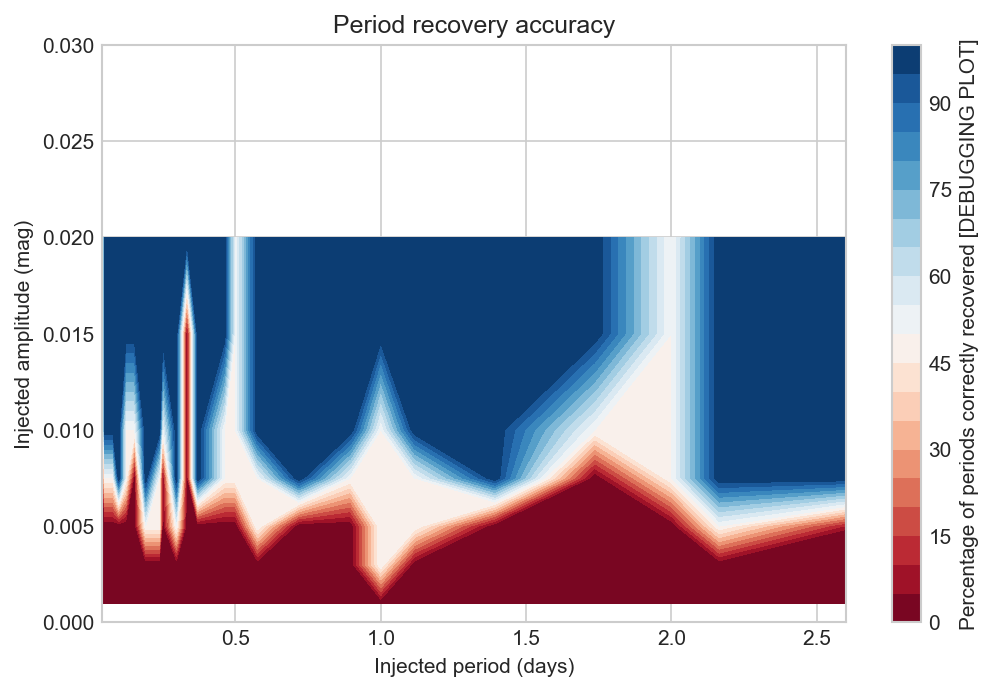

In [343]:
plt.style.use('seaborn-whitegrid')

if False:
    # DEBUGGING PLOT
    fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
    plt.contourf(periods7_append_sorted, amplitudes7[:-2], 100*np.array(output7[0]).T, levels=100*np.linspace(0,1,21), cmap='RdBu')
    plt.ylim(0,0.03)
    plt.xlabel("Injected period (days)")
    plt.ylabel("Injected amplitude (mag)")
    plt.title("Period recovery accuracy")
    # plt.semilogx()
    plt.xlim(None,2.6)
    cbar = plt.colorbar()
    cbar.set_label("Percentage of periods correctly recovered [DEBUGGING PLOT]")


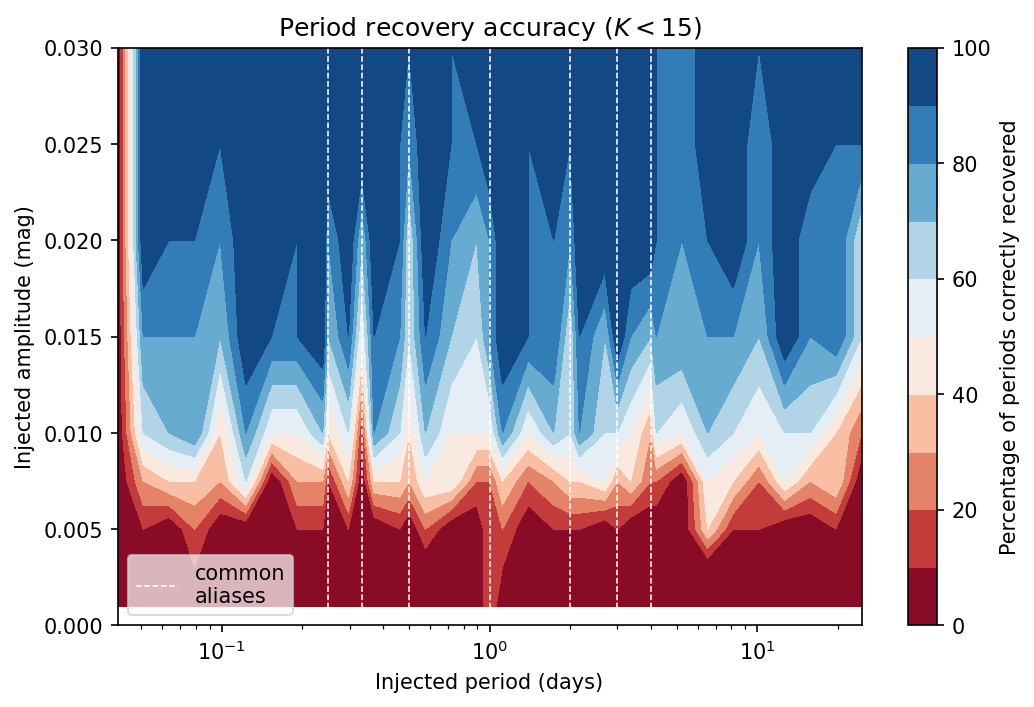

In [376]:
plt.style.use('default')


fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods7_append_sorted, amplitudes7, 100*np.array(output7[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title(r"Period recovery accuracy ($K < 15$)")
plt.semilogx()
# plt.xlim(None,2.6)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")

for per in extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='w')
    
plt.plot([0, 0], [0, 0], lw=0.75, ls='--', color='w', label='common\naliases')
plt.legend(loc='lower left', framealpha=0.7)
    


In [366]:
q2_faint = (17 > spread[q2]['mean']['KAPERMAG3']) & (16.9 < spread[q2]['mean']['KAPERMAG3'])
q2_faint_spread = spread[q2][q2_faint]

all_faint_sids = np.unique(q2_faint_spread.index)
faint_sids = np.random.choice(all_faint_sids, 10)
print(faint_sids)

[44989782481411 44989782469855 44989782457635 44989782474845
 44989782487669 44989782443172 44989782443575 44989782431287
 44989782431317 44989782487797]


In [371]:
startTime = datetime.now()
print(f"Starting at: {startTime}")


amplitudes8 = np.array(amplitudes6) * 4
# periods8_testing = [0.5, 1.5]
periods8 = periods7_append_sorted
output8_faint = recovery_score(dat, faint_sids, periods8, amplitudes8)
# periods8 = periods7_append_sorted
# output8_faint = recovery_score(dat, faint_sids, periods8, amplitudes8)

print(f"elapsed time: ", datetime.now() - startTime)


Starting at: 2021-07-22 20:42:32.379281
A=0.00 mag. Incorrect period: 0.06 v. 0.04
A=0.00 mag. Incorrect period: 0.12 v. 0.04
A=0.00 mag. Incorrect period: 0.11 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.04 v. 0.04
A=0.00 mag. Incorrect period: 0.09 v. 0.04
A=0.00 mag. Incorrect period: 0.07 v. 0.04
A=0.00 mag. Incorrect period: 0.12 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.06 v. 0.04
A=0.01 mag. Incorrect period: 0.12 v. 0.04
A=0.01 mag. Incorrect period: 0.11 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 0.04 v. 0.04
A=0.01 mag. Incorrect period: 0.17 v. 0.04
A=0.01 mag. Incorrect period: 0.07 v. 0.04
A=0.01 mag. Incorrect period: 0.12 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.02 mag. Incorrect period: 0.06 v. 0.04
A=0.02 mag. Incorrect period: 0.12 v. 0.04
A=0.02 mag. In

A=0.01 mag. Incorrect period: 0.11 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.09 v. 0.06
A=0.01 mag. Incorrect period: 0.07 v. 0.06
A=0.01 mag. Incorrect period: 0.08 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.02 mag. Incorrect period: 0.16 v. 0.06
A=0.02 mag. Incorrect period: 0.12 v. 0.06
A=0.02 mag. Incorrect period: 0.11 v. 0.06
A=0.02 mag. Incorrect period: 0.04 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Incorrect period: 0.09 v. 0.06
A=0.02 mag. Incorrect period: 0.07 v. 0.06
A=0.02 mag. Incorrect period: 0.08 v. 0.06
A=0.02 mag. Incorrect period: 0.04 v. 0.06
A=0.02 mag. Incorrect period: 0.05 v. 0.06
A=0.03 mag. Incorrect period: 0.09 v. 0.06
A=0.03 mag. Incorrect period: 0.12 v. 0.06
A=0.03 mag. Incorrect period: 0.11 v. 0.06
A=0.03 mag. Incorrect period: 0.04 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Incor

A=0.02 mag. Incorrect period: 0.05 v. 0.10
A=0.02 mag. Incorrect period: 0.09 v. 0.10
A=0.02 mag. Incorrect period: 0.04 v. 0.10
A=0.02 mag. Incorrect period: 0.05 v. 0.10
A=0.03 mag. Incorrect period: 0.07 v. 0.10
A=0.03 mag. Incorrect period: 0.12 v. 0.10
A=0.03 mag. Incorrect period: 0.11 v. 0.10
A=0.03 mag. Incorrect period: 0.28 v. 0.10
A=0.03 mag. Incorrect period: 0.04 v. 0.10
A=0.03 mag. Incorrect period: 0.15 v. 0.10
A=0.03 mag. Incorrect period: 0.05 v. 0.10
A=0.03 mag. Incorrect period: 0.09 v. 0.10
A=0.03 mag. Incorrect period: 0.12 v. 0.10
A=0.03 mag. Incorrect period: 0.05 v. 0.10
A=0.04 mag. Incorrect period: 0.08 v. 0.10
A=0.04 mag. Incorrect period: 0.12 v. 0.10
A=0.04 mag. Incorrect period: 0.11 v. 0.10
A=0.04 mag. Correct period: 0.10 v. 0.10
A=0.04 mag. Incorrect period: 0.04 v. 0.10
A=0.04 mag. Incorrect period: 0.15 v. 0.10
A=0.04 mag. Incorrect period: 0.05 v. 0.10
A=0.04 mag. Incorrect period: 0.09 v. 0.10
A=0.04 mag. Incorrect period: 0.12 v. 0.10
A=0.04 mag. C

A=0.04 mag. Incorrect period: 0.12 v. 0.15
A=0.04 mag. Correct period: 0.15 v. 0.15
A=0.04 mag. Incorrect period: 0.05 v. 0.15
A=0.04 mag. Incorrect period: 0.06 v. 0.15
A=0.04 mag. Correct period: 0.15 v. 0.15
A=0.04 mag. Correct period: 0.15 v. 0.15
A=0.04 mag. Incorrect period: 0.13 v. 0.15
A=0.04 mag. Correct period: 0.15 v. 0.15
A=0.04 mag. Incorrect period: 0.35 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Correct period: 0.15 v. 0.15
A=0.06 mag. Incorrect period: 0.35 v. 0.15
A=0.08 mag. Correct period: 0.15 v. 0.15
A=0.08 mag. Correct period: 0.15 v. 0.15
A=0.08 mag. Correct period: 0.15 v. 0.15
A=0.08 mag. Correct period: 0.15 v. 0.15
A=0.08 mag. Correct period: 0.15 v. 0.15
A=0.

A=0.06 mag. Correct period: 0.24 v. 0.24
A=0.06 mag. Correct period: 0.24 v. 0.24
A=0.06 mag. Correct period: 0.24 v. 0.24
A=0.06 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Incorrect period: 0.19 v. 0.24
A=0.08 mag. Incorrect period: 0.19 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.08 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.10 mag. Correct period: 0.24 v. 0.24
A=0.12 mag. 

A=0.10 mag. Incorrect period: 0.42 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Incorrect period: 0.23 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Correct period: 0.30 v. 0.30
A=0.10 mag. Incorrect period: 0.42 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.12 mag. Correct period: 0.30 v. 0.30
A=0.00 mag. Incorrect period: 0.06 v. 0.33
A=0.00 mag. Incorrect period: 0.12 v. 0.33
A=0.00 mag. Incorrect period: 0.11 v. 0.33
A=0.00 mag. Incorrect period: 0.04 v. 0.33
A=

A=0.12 mag. Correct period: 0.37 v. 0.37
A=0.12 mag. Correct period: 0.37 v. 0.37
A=0.12 mag. Correct period: 0.37 v. 0.37
A=0.12 mag. Correct period: 0.37 v. 0.37
A=0.12 mag. Correct period: 0.37 v. 0.37
A=0.00 mag. Incorrect period: 0.06 v. 0.46
A=0.00 mag. Incorrect period: 0.12 v. 0.46
A=0.00 mag. Incorrect period: 0.11 v. 0.46
A=0.00 mag. Incorrect period: 0.04 v. 0.46
A=0.00 mag. Incorrect period: 0.04 v. 0.46
A=0.00 mag. Incorrect period: 0.09 v. 0.46
A=0.00 mag. Incorrect period: 0.07 v. 0.46
A=0.00 mag. Incorrect period: 0.12 v. 0.46
A=0.00 mag. Incorrect period: 0.05 v. 0.46
A=0.00 mag. Incorrect period: 0.05 v. 0.46
A=0.01 mag. Incorrect period: 0.07 v. 0.46
A=0.01 mag. Incorrect period: 0.12 v. 0.46
A=0.01 mag. Incorrect period: 0.11 v. 0.46
A=0.01 mag. Incorrect period: 0.04 v. 0.46
A=0.01 mag. Incorrect period: 0.06 v. 0.46
A=0.01 mag. Incorrect period: 0.09 v. 0.46
A=0.01 mag. Incorrect period: 0.07 v. 0.46
A=0.01 mag. Incorrect period: 0.09 v. 0.46
A=0.01 mag. Incorrect

A=0.00 mag. Incorrect period: 0.05 v. 0.58
A=0.01 mag. Incorrect period: 0.07 v. 0.58
A=0.01 mag. Incorrect period: 0.12 v. 0.58
A=0.01 mag. Incorrect period: 0.11 v. 0.58
A=0.01 mag. Incorrect period: 0.04 v. 0.58
A=0.01 mag. Incorrect period: 0.04 v. 0.58
A=0.01 mag. Incorrect period: 0.26 v. 0.58
A=0.01 mag. Correct period: 0.57 v. 0.58
A=0.01 mag. Incorrect period: 0.12 v. 0.58
A=0.01 mag. Incorrect period: 0.05 v. 0.58
A=0.01 mag. Incorrect period: 0.05 v. 0.58
A=0.02 mag. Incorrect period: 0.07 v. 0.58
A=0.02 mag. Incorrect period: 0.12 v. 0.58
A=0.02 mag. Incorrect period: 0.11 v. 0.58
A=0.02 mag. Incorrect period: 0.04 v. 0.58
A=0.02 mag. Incorrect period: 0.05 v. 0.58
A=0.02 mag. Incorrect period: 0.26 v. 0.58
A=0.02 mag. Correct period: 0.57 v. 0.58
A=0.02 mag. Incorrect period: 0.12 v. 0.58
A=0.02 mag. Incorrect period: 0.16 v. 0.58
A=0.02 mag. Incorrect period: 0.05 v. 0.58
A=0.03 mag. Incorrect period: 0.09 v. 0.58
A=0.03 mag. Incorrect period: 0.12 v. 0.58
A=0.03 mag. Inc

A=0.02 mag. Incorrect period: 0.04 v. 0.90
A=0.02 mag. Incorrect period: 0.32 v. 0.90
A=0.02 mag. Incorrect period: 0.07 v. 0.90
A=0.02 mag. Incorrect period: 0.05 v. 0.90
A=0.02 mag. Incorrect period: 0.05 v. 0.90
A=0.02 mag. Incorrect period: 0.17 v. 0.90
A=0.03 mag. Correct period: 0.90 v. 0.90
A=0.03 mag. Incorrect period: 0.47 v. 0.90
A=0.03 mag. Incorrect period: 0.11 v. 0.90
A=0.03 mag. Incorrect period: 0.12 v. 0.90
A=0.03 mag. Incorrect period: 0.04 v. 0.90
A=0.03 mag. Incorrect period: 0.32 v. 0.90
A=0.03 mag. Incorrect period: 0.07 v. 0.90
A=0.03 mag. Incorrect period: 0.47 v. 0.90
A=0.03 mag. Incorrect period: 0.17 v. 0.90
A=0.03 mag. Incorrect period: 0.17 v. 0.90
A=0.04 mag. Correct period: 0.90 v. 0.90
A=0.04 mag. Incorrect period: 0.47 v. 0.90
A=0.04 mag. Incorrect period: 0.09 v. 0.90
A=0.04 mag. Correct period: 0.89 v. 0.90
A=0.04 mag. Incorrect period: 0.04 v. 0.90
A=0.04 mag. Incorrect period: 0.32 v. 0.90
A=0.04 mag. Incorrect period: 8.82 v. 0.90
A=0.04 mag. Corre

A=0.03 mag. Incorrect period: 0.05 v. 1.12
A=0.04 mag. Incorrect period: 0.30 v. 1.12
A=0.04 mag. Correct period: 1.12 v. 1.12
A=0.04 mag. Incorrect period: 0.11 v. 1.12
A=0.04 mag. Incorrect period: 0.04 v. 1.12
A=0.04 mag. Incorrect period: 0.16 v. 1.12
A=0.04 mag. Incorrect period: 0.53 v. 1.12
A=0.04 mag. Correct period: 1.11 v. 1.12
A=0.04 mag. Incorrect period: 0.08 v. 1.12
A=0.04 mag. Correct period: 1.11 v. 1.12
A=0.04 mag. Incorrect period: 9.36 v. 1.12
A=0.06 mag. Incorrect period: 9.35 v. 1.12
A=0.06 mag. Correct period: 1.12 v. 1.12
A=0.06 mag. Incorrect period: 0.53 v. 1.12
A=0.06 mag. Correct period: 1.12 v. 1.12
A=0.06 mag. Correct period: 1.12 v. 1.12
A=0.06 mag. Incorrect period: 0.53 v. 1.12
A=0.06 mag. Correct period: 1.11 v. 1.12
A=0.06 mag. Correct period: 1.12 v. 1.12
A=0.06 mag. Correct period: 1.11 v. 1.12
A=0.06 mag. Incorrect period: 9.35 v. 1.12
A=0.08 mag. Correct period: 1.12 v. 1.12
A=0.08 mag. Correct period: 1.12 v. 1.12
A=0.08 mag. Incorrect period: 0.5

A=0.06 mag. Incorrect period: 0.63 v. 1.74
A=0.06 mag. Correct period: 1.74 v. 1.74
A=0.06 mag. Correct period: 1.74 v. 1.74
A=0.06 mag. Correct period: 1.73 v. 1.74
A=0.06 mag. Incorrect period: 2.35 v. 1.74
A=0.06 mag. Correct period: 1.74 v. 1.74
A=0.06 mag. Incorrect period: 2.34 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.08 mag. Incorrect period: 0.63 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.08 mag. Correct period: 1.73 v. 1.74
A=0.08 mag. Incorrect period: 2.35 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.08 mag. Correct period: 1.74 v. 1.74
A=0.10 mag. Correct period: 1.74 v. 1.74
A=0.10 mag. Correct period: 1.74 v. 1.74
A=0.10 mag. Correct period: 1.74 v. 1.74
A=0.10 mag. Incorrect period: 0.63 v. 1.74
A=0.10 mag. Correct period: 1.74 v. 1.74
A=0.10 mag. Correct period: 1.74 v. 1.74
A=0.10 mag. Correct period: 1.74 v. 1.74
A=0.

A=0.08 mag. Correct period: 2.16 v. 2.16
A=0.08 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.17 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.17 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.10 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.17 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.12 mag. Correct period: 2.16 v. 2.16
A=0.00 mag. Incorrect period: 0.06 v. 2.70
A=0.00 mag. Incorrect period: 0.12 v. 2.70
A=0.00 mag. 

A=0.12 mag. Incorrect period: 1.49 v. 3.00
A=0.12 mag. Correct period: 3.00 v. 3.00
A=0.12 mag. Correct period: 3.00 v. 3.00
A=0.12 mag. Correct period: 3.00 v. 3.00
A=0.12 mag. Correct period: 3.00 v. 3.00
A=0.12 mag. Correct period: 3.00 v. 3.00
A=0.12 mag. Correct period: 3.00 v. 3.00
A=0.00 mag. Incorrect period: 0.06 v. 3.36
A=0.00 mag. Incorrect period: 0.12 v. 3.36
A=0.00 mag. Incorrect period: 0.11 v. 3.36
A=0.00 mag. Incorrect period: 0.04 v. 3.36
A=0.00 mag. Incorrect period: 0.04 v. 3.36
A=0.00 mag. Incorrect period: 0.09 v. 3.36
A=0.00 mag. Incorrect period: 0.07 v. 3.36
A=0.00 mag. Incorrect period: 0.12 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.00 mag. Incorrect period: 0.05 v. 3.36
A=0.01 mag. Incorrect period: 0.06 v. 3.36
A=0.01 mag. Incorrect period: 0.12 v. 3.36
A=0.01 mag. Incorrect period: 0.11 v. 3.36
A=0.01 mag. Incorrect period: 0.04 v. 3.36
A=0.01 mag. Incorrect period: 0.04 v. 3.36
A=0.01 mag. Incorrect period: 0.09 v. 3.36
A=0.01 mag. Incorrect p

A=0.00 mag. Incorrect period: 0.05 v. 4.19
A=0.00 mag. Incorrect period: 0.05 v. 4.19
A=0.01 mag. Incorrect period: 0.06 v. 4.19
A=0.01 mag. Incorrect period: 0.12 v. 4.19
A=0.01 mag. Incorrect period: 0.11 v. 4.19
A=0.01 mag. Incorrect period: 0.04 v. 4.19
A=0.01 mag. Incorrect period: 0.04 v. 4.19
A=0.01 mag. Incorrect period: 0.26 v. 4.19
A=0.01 mag. Incorrect period: 0.07 v. 4.19
A=0.01 mag. Incorrect period: 0.09 v. 4.19
A=0.01 mag. Incorrect period: 0.05 v. 4.19
A=0.01 mag. Incorrect period: 0.05 v. 4.19
A=0.02 mag. Incorrect period: 0.06 v. 4.19
A=0.02 mag. Incorrect period: 0.12 v. 4.19
A=0.02 mag. Incorrect period: 0.11 v. 4.19
A=0.02 mag. Incorrect period: 0.04 v. 4.19
A=0.02 mag. Incorrect period: 0.04 v. 4.19
A=0.02 mag. Incorrect period: 0.26 v. 4.19
A=0.02 mag. Incorrect period: 0.07 v. 4.19
A=0.02 mag. Incorrect period: 0.09 v. 4.19
A=0.02 mag. Incorrect period: 0.05 v. 4.19
A=0.02 mag. Incorrect period: 0.05 v. 4.19
A=0.03 mag. Incorrect period: 0.06 v. 4.19
A=0.03 mag.

A=0.02 mag. Incorrect period: 0.11 v. 6.52
A=0.02 mag. Incorrect period: 0.04 v. 6.52
A=0.02 mag. Incorrect period: 0.06 v. 6.52
A=0.02 mag. Incorrect period: 0.04 v. 6.52
A=0.02 mag. Incorrect period: 0.07 v. 6.52
A=0.02 mag. Incorrect period: 0.11 v. 6.52
A=0.02 mag. Incorrect period: 0.05 v. 6.52
A=0.02 mag. Incorrect period: 0.05 v. 6.52
A=0.03 mag. Incorrect period: 0.06 v. 6.52
A=0.03 mag. Incorrect period: 0.12 v. 6.52
A=0.03 mag. Incorrect period: 0.06 v. 6.52
A=0.03 mag. Incorrect period: 0.04 v. 6.52
A=0.03 mag. Incorrect period: 0.16 v. 6.52
A=0.03 mag. Incorrect period: 0.04 v. 6.52
A=0.03 mag. Incorrect period: 0.07 v. 6.52
A=0.03 mag. Incorrect period: 0.11 v. 6.52
A=0.03 mag. Incorrect period: 0.05 v. 6.52
A=0.03 mag. Incorrect period: 0.05 v. 6.52
A=0.04 mag. Correct period: 6.55 v. 6.52
A=0.04 mag. Incorrect period: 0.87 v. 6.52
A=0.04 mag. Incorrect period: 0.11 v. 6.52
A=0.04 mag. Incorrect period: 0.07 v. 6.52
A=0.04 mag. Incorrect period: 0.16 v. 6.52
A=0.04 mag. I

A=0.03 mag. Incorrect period: 0.07 v. 10.14
A=0.03 mag. Incorrect period: 0.04 v. 10.14
A=0.03 mag. Incorrect period: 0.17 v. 10.14
A=0.03 mag. Incorrect period: 0.05 v. 10.14
A=0.04 mag. Incorrect period: 0.20 v. 10.14
A=0.04 mag. Incorrect period: 0.12 v. 10.14
A=0.04 mag. Incorrect period: 0.12 v. 10.14
A=0.04 mag. Incorrect period: 0.04 v. 10.14
A=0.04 mag. Correct period: 10.13 v. 10.14
A=0.04 mag. Incorrect period: 10.33 v. 10.14
A=0.04 mag. Incorrect period: 0.07 v. 10.14
A=0.04 mag. Incorrect period: 0.04 v. 10.14
A=0.04 mag. Incorrect period: 0.05 v. 10.14
A=0.04 mag. Incorrect period: 0.42 v. 10.14
A=0.06 mag. Correct period: 10.09 v. 10.14
A=0.06 mag. Incorrect period: 0.15 v. 10.14
A=0.06 mag. Correct period: 10.15 v. 10.14
A=0.06 mag. Correct period: 10.18 v. 10.14
A=0.06 mag. Correct period: 10.13 v. 10.14
A=0.06 mag. Incorrect period: 10.29 v. 10.14
A=0.06 mag. Incorrect period: 9.61 v. 10.14
A=0.06 mag. Correct period: 10.11 v. 10.14
A=0.06 mag. Correct period: 10.17 v.

A=0.04 mag. Incorrect period: 0.48 v. 15.76
A=0.04 mag. Incorrect period: 1.03 v. 15.76
A=0.04 mag. Incorrect period: 0.07 v. 15.76
A=0.04 mag. Incorrect period: 0.04 v. 15.76
A=0.04 mag. Incorrect period: 0.11 v. 15.76
A=0.04 mag. Incorrect period: 0.05 v. 15.76
A=0.06 mag. Correct period: 15.72 v. 15.76
A=0.06 mag. Incorrect period: 0.48 v. 15.76
A=0.06 mag. Incorrect period: 15.92 v. 15.76
A=0.06 mag. Incorrect period: 15.95 v. 15.76
A=0.06 mag. Incorrect period: 0.94 v. 15.76
A=0.06 mag. Correct period: 15.82 v. 15.76
A=0.06 mag. Correct period: 15.77 v. 15.76
A=0.06 mag. Correct period: 15.72 v. 15.76
A=0.06 mag. Incorrect period: 1.07 v. 15.76
A=0.06 mag. Incorrect period: 1.06 v. 15.76
A=0.08 mag. Correct period: 15.72 v. 15.76
A=0.08 mag. Incorrect period: 0.48 v. 15.76
A=0.08 mag. Correct period: 15.90 v. 15.76
A=0.08 mag. Correct period: 15.90 v. 15.76
A=0.08 mag. Correct period: 15.70 v. 15.76
A=0.08 mag. Correct period: 15.80 v. 15.76
A=0.08 mag. Correct period: 15.77 v. 15

A=0.06 mag. Correct period: 24.45 v. 24.50
A=0.06 mag. Correct period: 24.57 v. 24.50
A=0.06 mag. Correct period: 24.45 v. 24.50
A=0.06 mag. Incorrect period: 0.05 v. 24.50
A=0.06 mag. Incorrect period: 24.81 v. 24.50
A=0.06 mag. Incorrect period: 24.88 v. 24.50
A=0.06 mag. Correct period: 24.51 v. 24.50
A=0.06 mag. Incorrect period: 0.05 v. 24.50
A=0.08 mag. Incorrect period: 23.75 v. 24.50
A=0.08 mag. Correct period: 24.27 v. 24.50
A=0.08 mag. Correct period: 24.45 v. 24.50
A=0.08 mag. Correct period: 24.51 v. 24.50
A=0.08 mag. Correct period: 24.45 v. 24.50
A=0.08 mag. Correct period: 24.33 v. 24.50
A=0.08 mag. Incorrect period: 24.75 v. 24.50
A=0.08 mag. Incorrect period: 24.81 v. 24.50
A=0.08 mag. Correct period: 24.51 v. 24.50
A=0.08 mag. Incorrect period: 0.96 v. 24.50
A=0.10 mag. Incorrect period: 23.98 v. 24.50
A=0.10 mag. Correct period: 24.33 v. 24.50
A=0.10 mag. Correct period: 24.45 v. 24.50
A=0.10 mag. Correct period: 24.51 v. 24.50
A=0.10 mag. Correct period: 24.45 v. 24

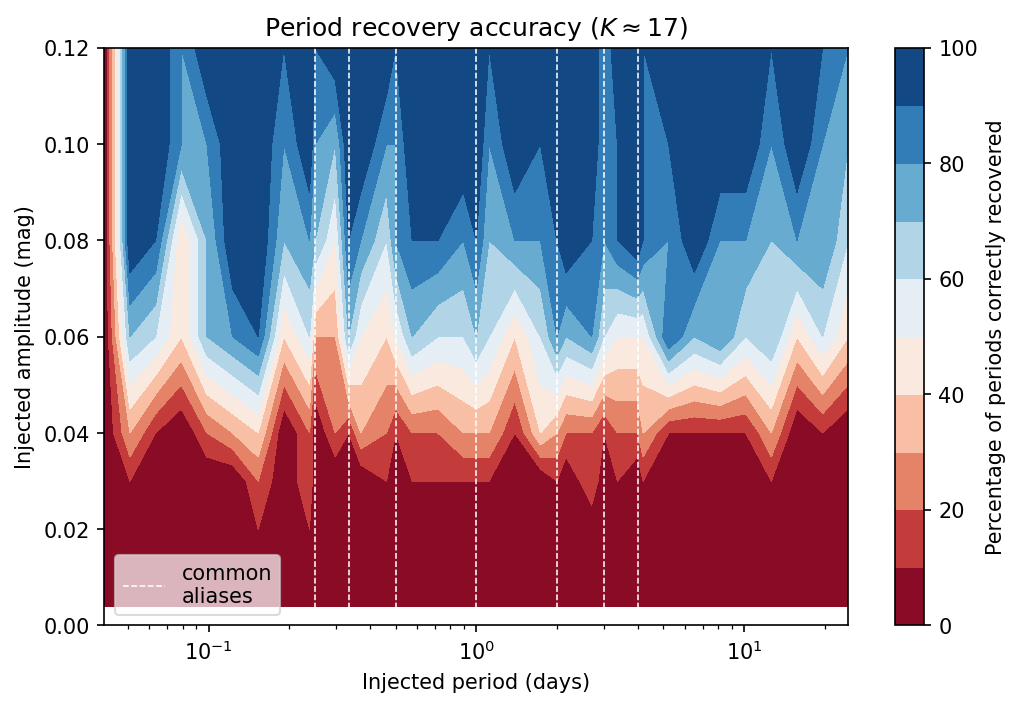

In [377]:
plt.style.use('default')

# TESTING

fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods8, amplitudes8, 100*np.array(output8_faint[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,None)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title(r"Period recovery accuracy ($K \approx 17$)")
plt.semilogx()
plt.xlim(None,None)
cbar = plt.colorbar()
cbar.set_label("Percentage of periods correctly recovered")

for per in extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='w')
    
plt.plot([0, 0], [0, 0], lw=0.75, ls='--', color='w', label='common\naliases')
plt.legend(loc='lower left', framealpha=0.7)
    


In [383]:
scores_l, found_periods_l, faps_l = output7
scores = np.array(scores_l)
found_periods = np.array(found_periods_l)
faps = np.array(faps_l)

In [392]:
faps[0].flatten().shape

(90,)

Text(0, 0.5, '$-\\log_{10}(FAP)$')

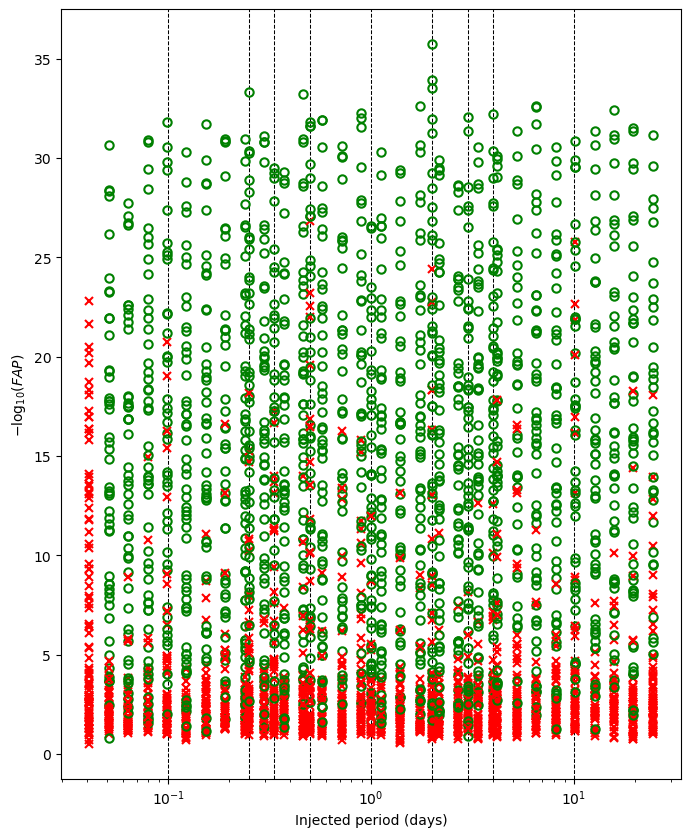

In [418]:
fig, ax = plt.subplots(1, figsize=(8,10))
correct_flag = 0
incorrect_flag = 0
for i, period in enumerate(periods8):
    
    for j, (found_period, fap) in enumerate(zip(found_periods[i].flatten(), faps[i].flatten())):
        
        if np.abs(found_period - period) / period < 0.01:
                        
            plt.plot(period, -np.log10(fap), marker='o', markerfacecolor="None", markeredgecolor='g', markeredgewidth=1.5)
        else:
            plt.plot(period, -np.log10(fap), marker='x',markeredgecolor='r', markeredgewidth=1.5)
            
more_extra_periods = list(extra_periods)
more_extra_periods.extend([1/10, 10])
for per in more_extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='k', zorder=-1)    
plt.semilogx()
plt.xlabel("Injected period (days)")
plt.ylabel(r"$-\log_{10}(FAP)$")

In [436]:
print(len(amplitudes7))
print(found_periods.shape)
print(found_periods[:,0].shape)
print(found_periods[:,0,0].shape)

9
(37, 9, 10)
(37, 10)
(37,)


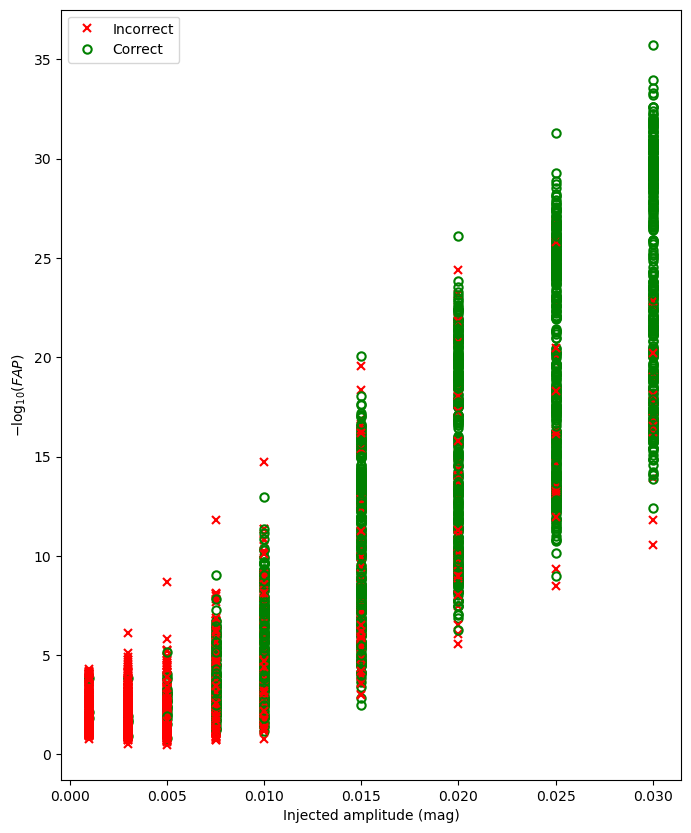

In [462]:
fig, ax = plt.subplots(1, figsize=(8,10))
correct_flag = 0
incorrect_flag = 0

for i, amplitude in enumerate(amplitudes7):
    
    for j, sid in enumerate(sids):
        
#         print(found_periods_by_amp.shape)
#         print(len(periods8))
        
#         break
        
#         for k, (period, found_period, fap) in enumerate(zip(periods8, found_periods_by_amp, faps_by_amp)):
        for k, period in enumerate(periods8):
            found_period = found_periods[k, i, j]
            fap = faps[k, i, j]
#             print(k, period, found_period, fap)
            
            if np.abs(found_period - period) / period < 0.01:
                plt.plot(
                    amplitude, 
                    -np.log10(fap), 
                    'go', 
                    markerfacecolor="None", 
                    markeredgecolor='g', 
                    markeredgewidth=1.5,
                    label="Correct" if correct_flag == 0 else "")
                correct_flag += 1
            else:
                plt.plot(
                    amplitude, 
                    -np.log10(fap), 
                    'rx',
                    markeredgecolor='r', 
                    markeredgewidth=1.5, 
                    label="Incorrect" if incorrect_flag == 0 else "")
                incorrect_flag += 1
               
            
# more_extra_periods = list(extra_periods)
# more_extra_periods.extend([1/10, 10])
# for per in more_extra_periods:
#     plt.axvline(per, lw=0.75, ls='--', color='k', zorder=-1)    
# plt.semilogx()
plt.xlabel("Injected amplitude (mag)")
plt.ylabel(r"$-\log_{10}(FAP)$")
plt.legend()

In [440]:
# fig, ax = plt.subplots(1, figsize=(8,10))

correct_faps = []
incorrect_faps = []
for i, amplitude in enumerate(amplitudes7):
    
    for j, sid in enumerate(sids):
        
#         print(found_periods_by_amp.shape)
#         print(len(periods8))
        
#         break
        
#         for k, (period, found_period, fap) in enumerate(zip(periods8, found_periods_by_amp, faps_by_amp)):
        for k, period in enumerate(periods8):
            found_period = found_periods[k, i, j]
            fap = faps[k, i, j]
#             print(k, period, found_period, fap)
            
            if np.abs(found_period - period) / period < 0.01:
                correct_faps.append(fap)
#                 plt.plot(amplitude, -np.log10(fap), marker='o', markerfacecolor="None", markeredgecolor='g', markeredgewidth=1.5)
            else:
#                 plt.plot(amplitude, -np.log10(fap), marker='x',markeredgecolor='r', markeredgewidth=1.5)
                incorrect_faps.append(fap)
            

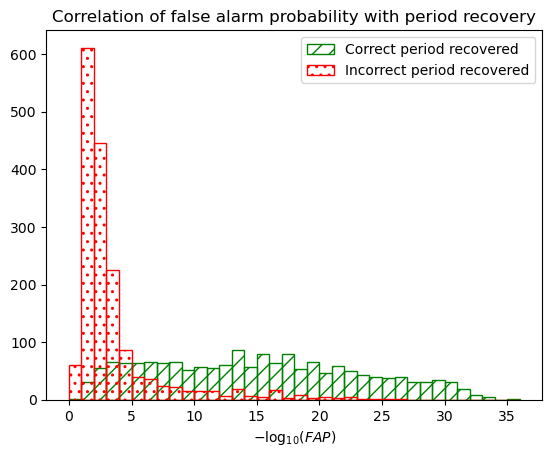

In [456]:
plt.hist(-np.log10(np.array(correct_faps)), edgecolor='g', facecolor="None", range=[0, 36], bins=36, hatch='//', label='Correct period recovered')
plt.hist(-np.log10(np.array(incorrect_faps)), edgecolor='r', facecolor="None", range=[0, 36], bins=36, hatch='..', label='Incorrect period recovered')

plt.xlabel("$-\log_{10}(FAP)$")
plt.title("Correlation of false alarm probability with period recovery")
plt.legend()

In [461]:
plt.plot?